# Verify the performance of detecting structures with low quality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from sklearn.metrics import roc_curve, auc

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)

In [3]:
df = pd.read_csv(score_dir / 'all_score.csv.gz', index_col=0)
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.965   0.857        0.899   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.966   0.859        0.900   
2        model_1_ptm_seed_0_rec_1_ens_1    0.980   0.965   0.852        0.901   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.964   0.856        0.899   
4        model_1_ptm_seed_0_rec_2_ens_1    0.980   0.961   0.852        0.900   
...                                 ...      ...     ...     ...          ...   
107795       model_5_seed_1_rec_7_ens_8    0.996   0.994   0.948        0.933   
107796       model_5_seed_1_rec_8_ens_1    0.996   0.993   0.949        0.935   
107797       model_5_seed_1_rec_8_ens_8    0.996   0.994   0.948        0.933   
107798       model_5_seed_1_rec_9_ens_1    0.996   0.993   0.948        0.937   
107799       model_5_seed_1_rec_9_ens_8    0.996   0.994   0.948        0.933   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
0           0.894  0.936     0.892      0.084  model_1_ptm  ... 116971.344   
1           0.895  0.937     0.893      0.054  model_1_ptm  ... 117449.914   
2           0.896  0.928     0.887     26.445  model_1_ptm  ... 118798.586   
3           0.895  0.928     0.887     26.413  model_1_ptm  ... 117463.500   
4           0.895  0.933     0.890      0.391  model_1_ptm  ... 118283.023   
...           ...    ...       ...        ...          ...  ...        ...   
107795      0.930  0.874       NaN      1.251      model_5  ... 343708.969   
107796      0.931  0.880       NaN      0.277      model_5  ... 341629.625   
107797      0.929  0.872       NaN      0.574      model_5  ... 342088.125   
107798      0.933  0.887       NaN      0.334      model_5  ... 344117.938   
107799      0.929  0.873       NaN      0.471      model_5  ... 342127.625   

        DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
0            0.977            0.981  0.941   0.660        0.690       0.922   
1            0.978            0.981  0.941   0.664        0.691       0.924   
2            0.975            0.971  0.939   0.621        0.658       0.906   
3            0.973            0.971  0.939   0.625        0.677       0.910   
4            0.976            0.971  0.941   0.667        0.697       0.922   
...            ...              ...    ...     ...          ...         ...   
107795       0.848            0.837  0.880   0.664        0.803       0.914   
107796       0.845            0.854  0.881   0.678        0.808       0.914   
107797       0.844            0.821  0.881   0.648        0.804       0.913   
107798       0.856            0.869  0.879   0.682        0.806       0.915   
107799       0.842            0.823  0.878   0.679        0.808       0.916   

       ProQ3D  SBROD VoroCNN  
0       0.795  1.561   0.679  
1       0.798  1.563   0.679  
2       0.763  1.560   0.680  
3       0.770  1.561   0.679  
4       0.804  1.562   0.677  
...       ...    ...     ...  
107795  0.870  1.879   0.702  
107796  0.872  1.888   0.705  
107797  0.868  1.874   0.705  
107798  0.872  1.879   0.702  
107799  0.870  1.880   0.704  

[107800 rows x 37 columns]

## Case 1: Negative examples are structures with the label value is less than the threshold value

In [4]:
# Against gdtts
mqa_methods = ['ProQ3D', 'VoroCNN', 'P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert']
methods = mqa_methods + ['pLDDT', 'pTMscore']

In [5]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        df[l] = df[label] > threshold
        counts.append(df[l].value_counts())
pd.concat(counts, axis=1).T.fillna(0).astype(int)

True   False
GDT_TS_0.5     106033   1767
GDT_TS_0.6     103853   3947
GDT_TS_0.7      99843   7957
GDT_TS_0.8      91882  15918
GDT_HA_0.5     102910   4890
GDT_HA_0.6      97790  10010
GDT_HA_0.7      86770  21030
GDT_HA_0.8      66732  41068
TMscore_0.5    106692   1108
TMscore_0.6    104800   3000
TMscore_0.7    101944   5856
TMscore_0.8     97179  10621
Mean_LDDT_0.5   97382  10418
Mean_LDDT_0.6   97227  10573
Mean_LDDT_0.7   96446  11354
Mean_LDDT_0.8   86373  21427

In [6]:
label = 'GDT_TS'
threshold = 0.7
l = f'{label}_{threshold}'
df[l]

0         True
1         True
2         True
3         True
4         True
          ... 
107795    True
107796    True
107797    True
107798    True
107799    True
Name: GDT_TS_0.7, Length: 107800, dtype: bool

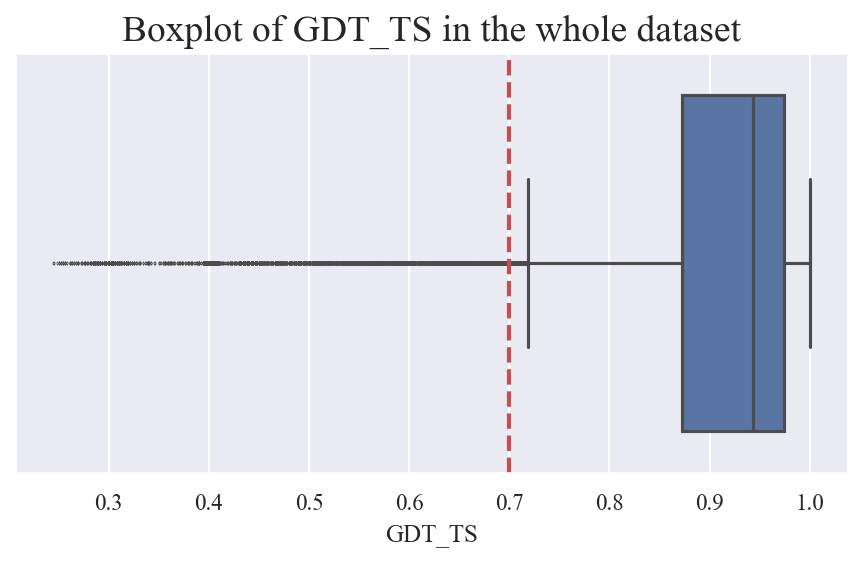

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='GDT_TS', fliersize=0.1)
plt.title('Boxplot of GDT_TS in the whole dataset', fontsize=18)
plt.axvline(x=0.7, color='r', linestyle='--', linewidth=2)
plt.tight_layout()

In [8]:
from sklearn.metrics import roc_curve, auc

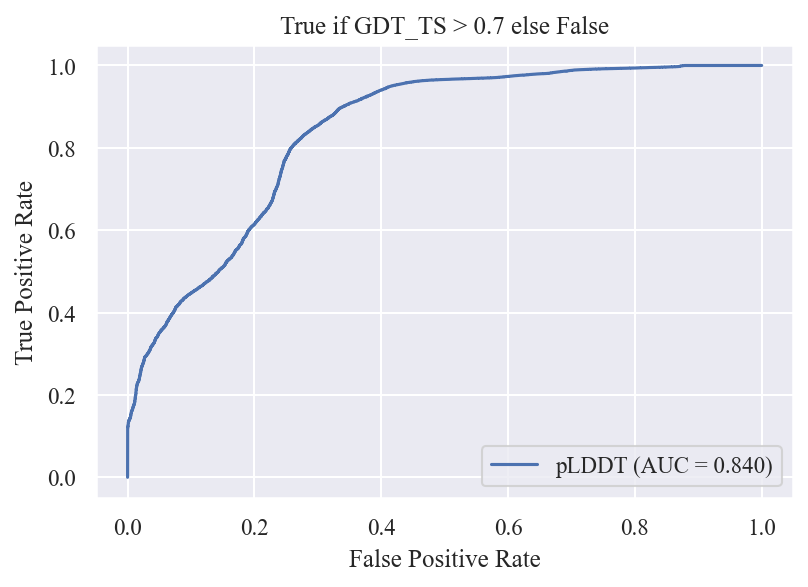

In [9]:
label = 'GDT_TS'
threshold = 0.7
l = f'{label}_{threshold}'
x = df[l]
score = 'pLDDT'
y = df[score]
fpr, tpr, thresholds = roc_curve(x, y)
a= auc(fpr, tpr)
plt.title(f'True if {label} > {threshold} else False')
plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107800 entries, 0 to 107799
Data columns (total 53 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Model                                107800 non-null  object 
 1   TMscore                              107800 non-null  float64
 2   GDT_TS                               107800 non-null  float64
 3   GDT_HA                               107800 non-null  float64
 4   Global_LDDT                          98400 non-null   float64
 5   Mean_LDDT                            98400 non-null   float64
 6   pLDDT                                107800 non-null  float64
 7   pTMscore                             53900 non-null   float64
 8   Tolerance                            107800 non-null  float64
 9   ModelName                            107800 non-null  object 
 10  Seed                                 107800 non-null  int64  
 11  Recycle      

In [11]:
methods

['ProQ3D',
 'VoroCNN',
 'P3CMQA',
 'DeepAccNet',
 'DeepAccNet-Bert',
 'pLDDT',
 'pTMscore']

In [12]:
df['pTMscore'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
107795     True
107796     True
107797     True
107798     True
107799     True
Name: pTMscore, Length: 107800, dtype: bool

pTMscore


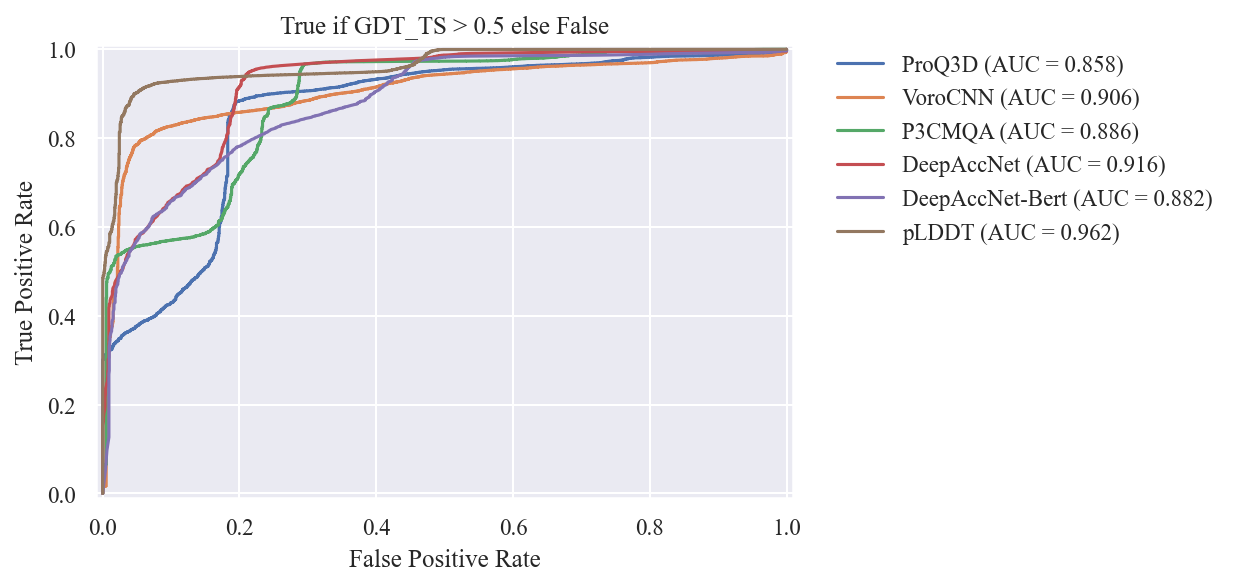

<Figure size 750x600 with 0 Axes>

pTMscore


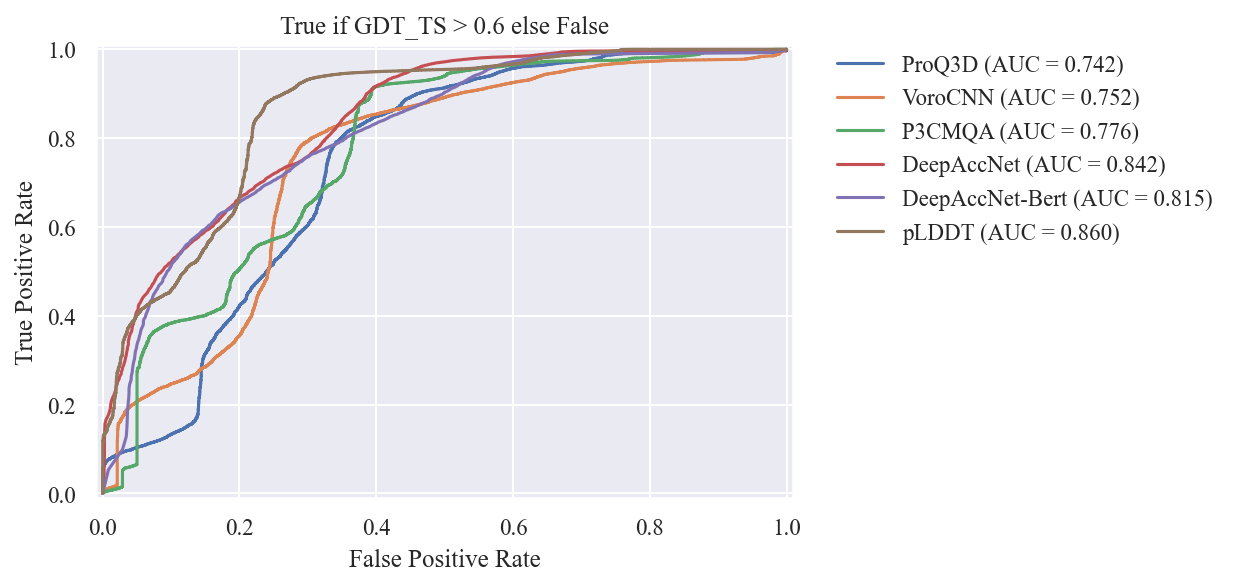

<Figure size 750x600 with 0 Axes>

pTMscore


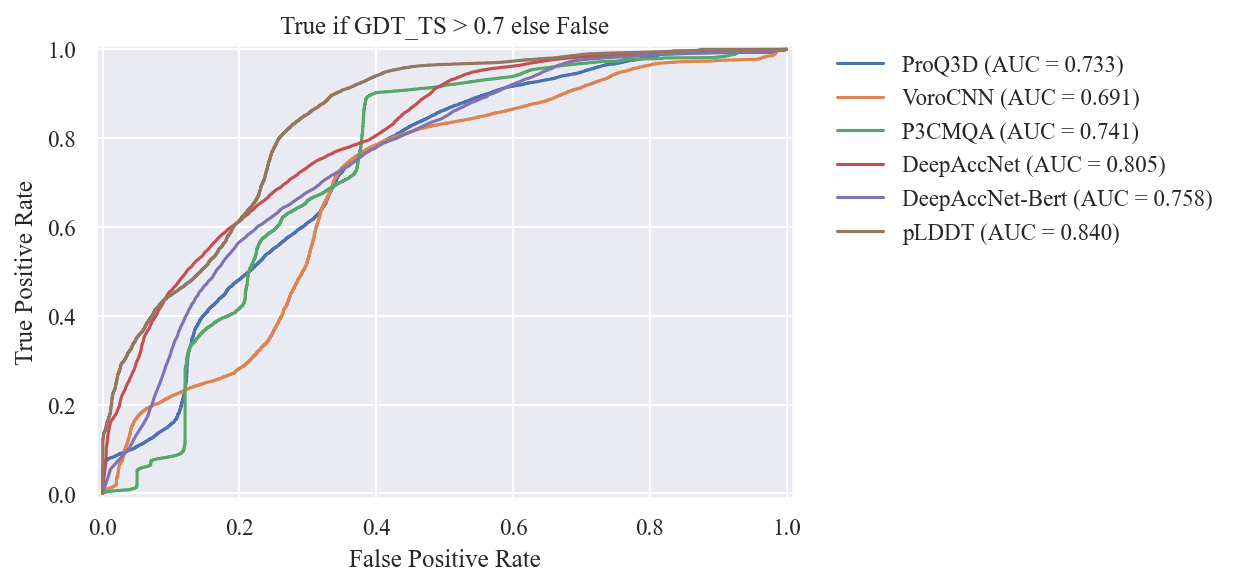

<Figure size 750x600 with 0 Axes>

pTMscore


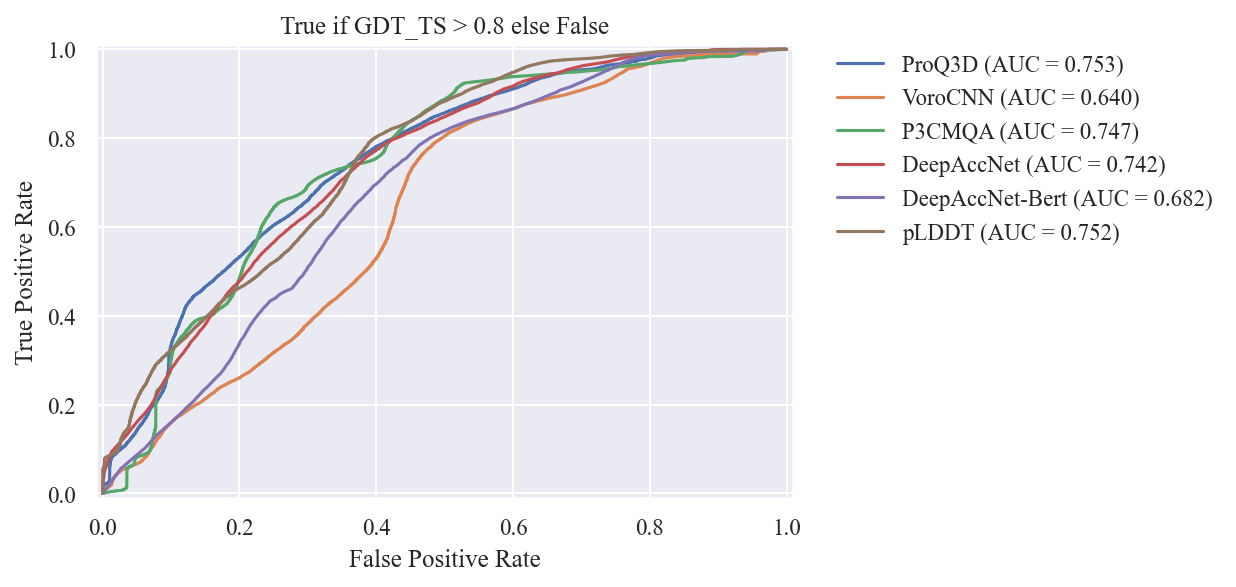

<Figure size 750x600 with 0 Axes>

pTMscore


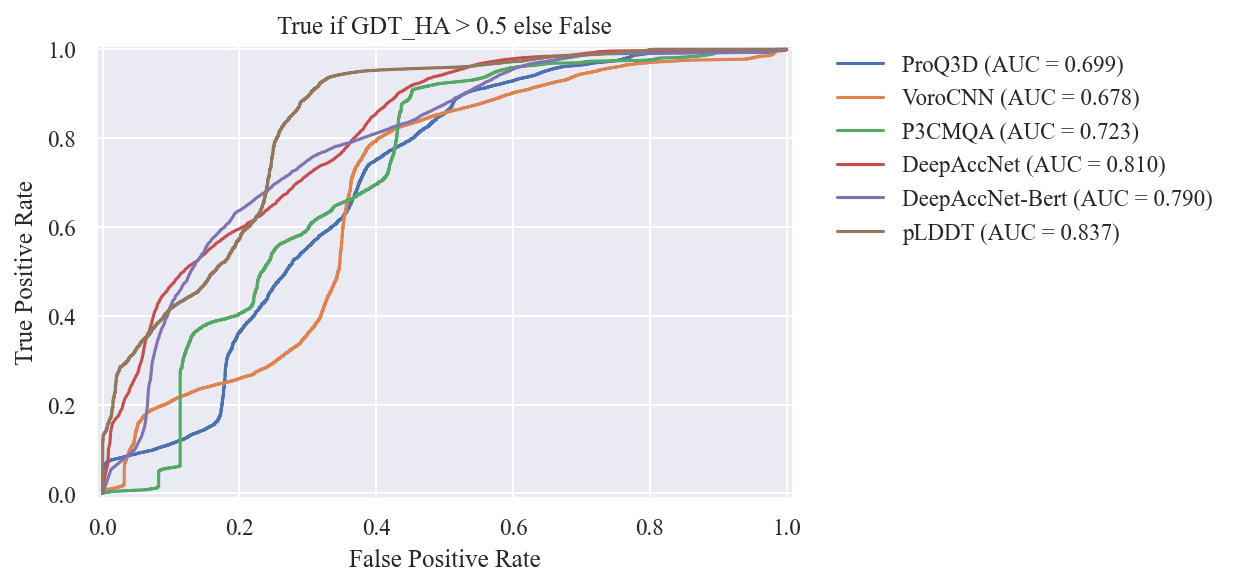

<Figure size 750x600 with 0 Axes>

pTMscore


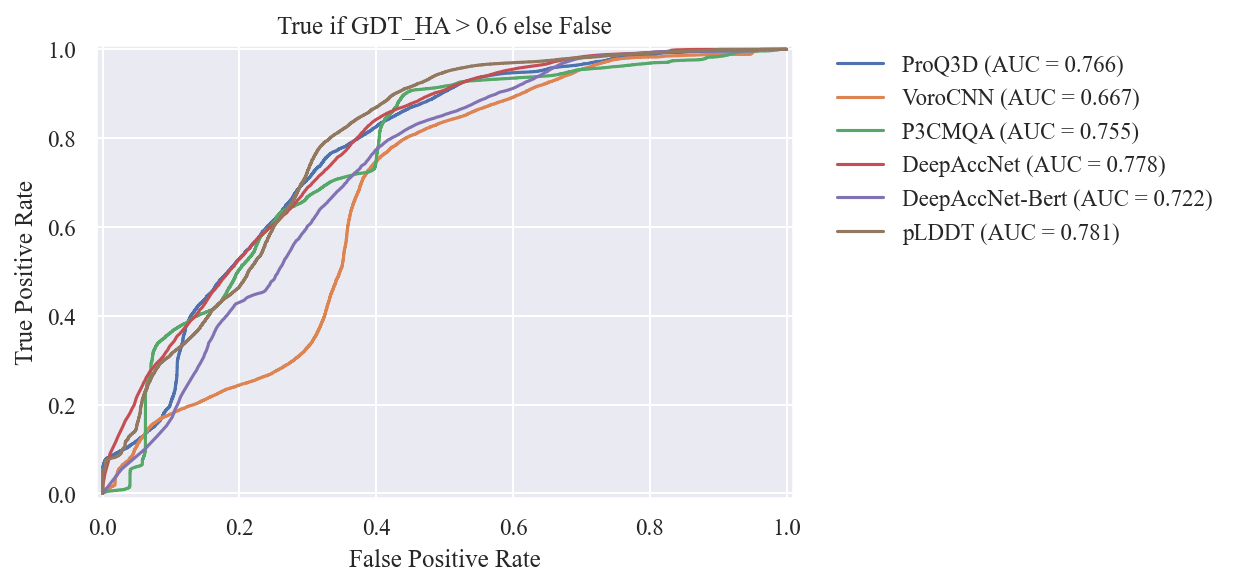

<Figure size 750x600 with 0 Axes>

pTMscore


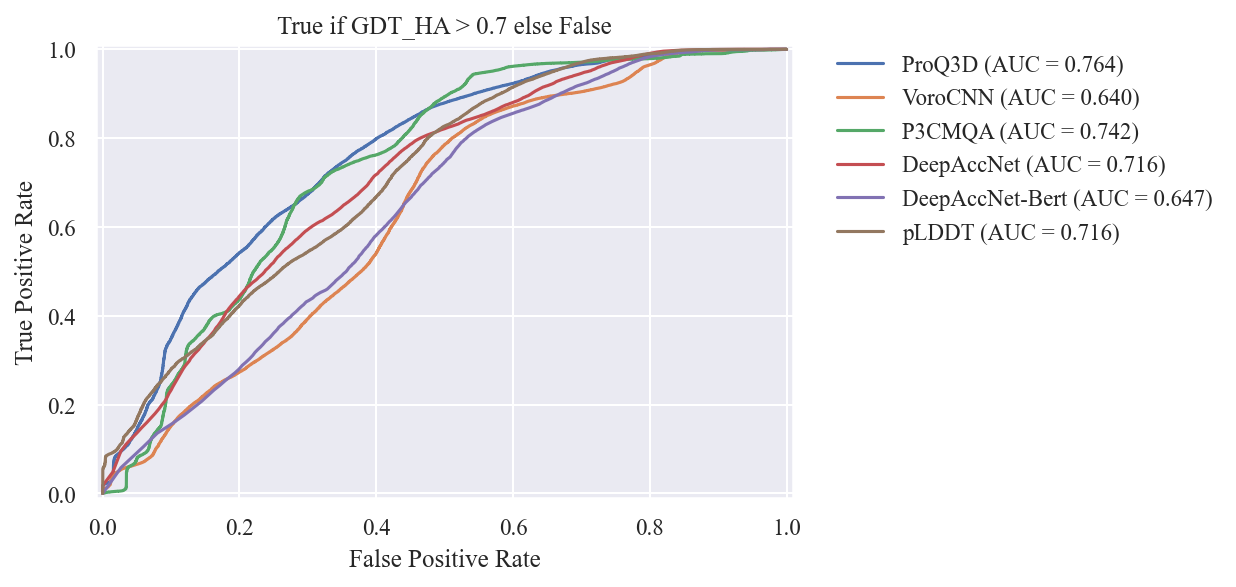

<Figure size 750x600 with 0 Axes>

pTMscore


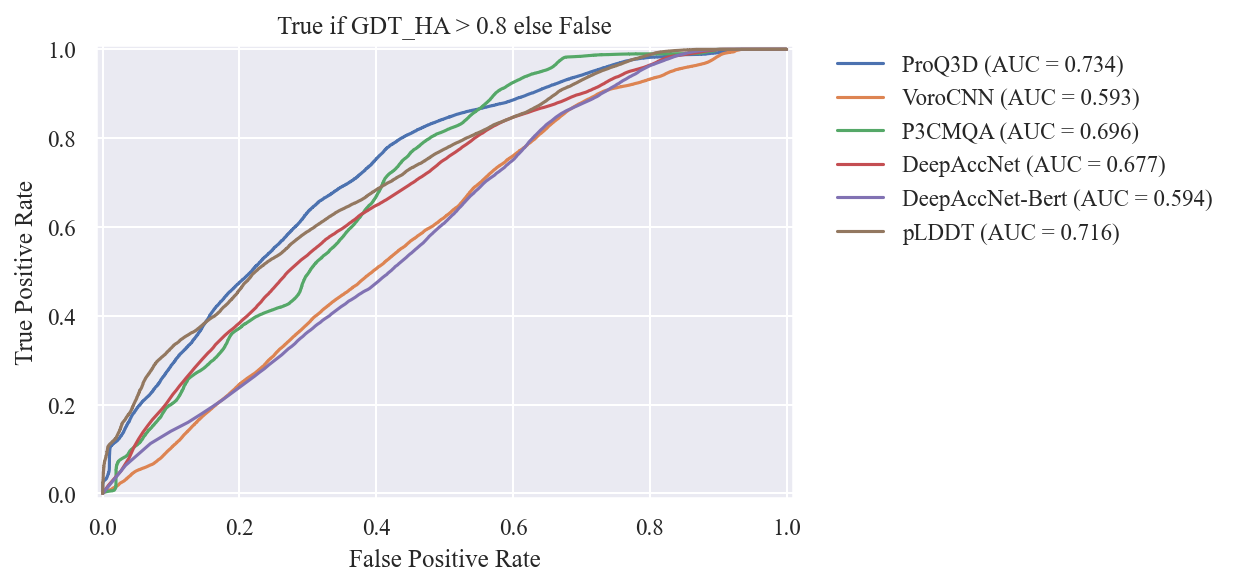

<Figure size 750x600 with 0 Axes>

pTMscore


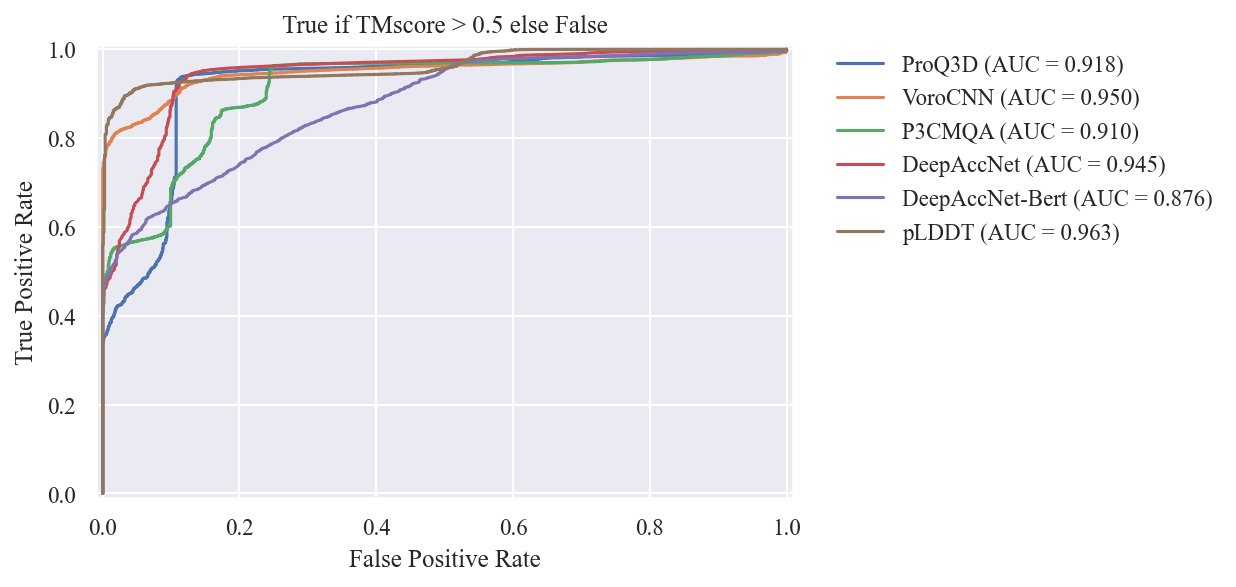

<Figure size 750x600 with 0 Axes>

pTMscore


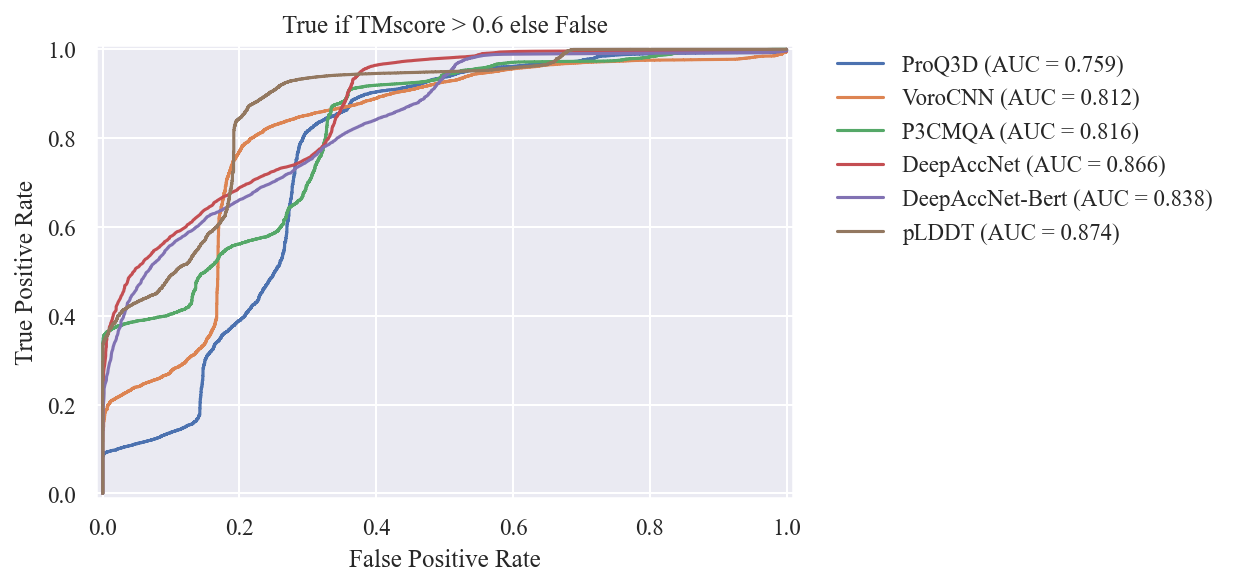

<Figure size 750x600 with 0 Axes>

pTMscore


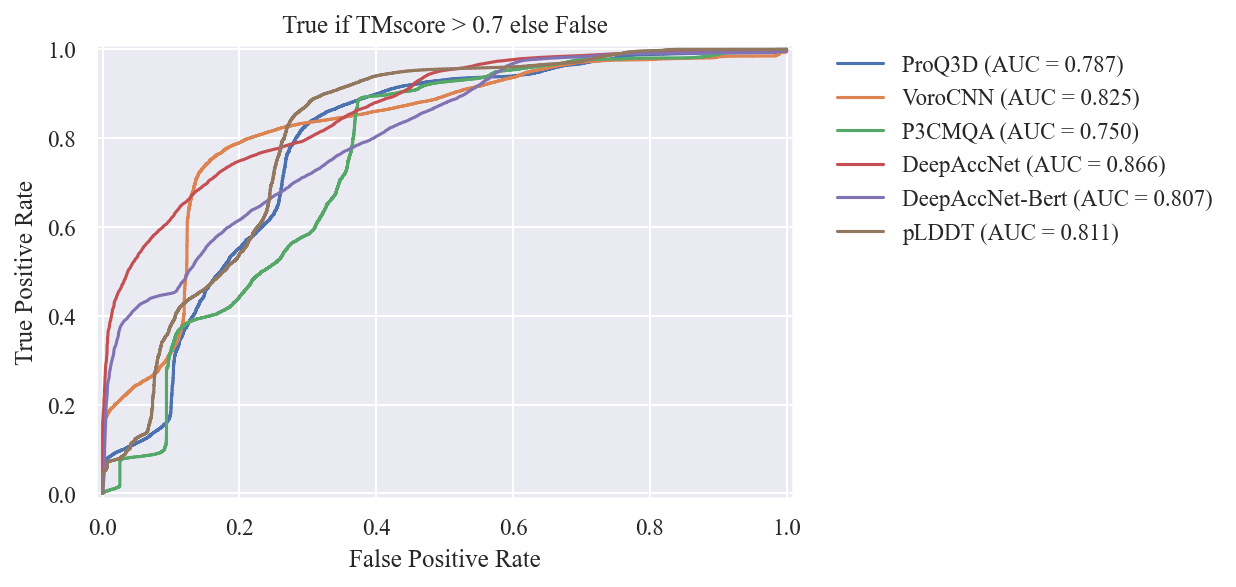

<Figure size 750x600 with 0 Axes>

pTMscore


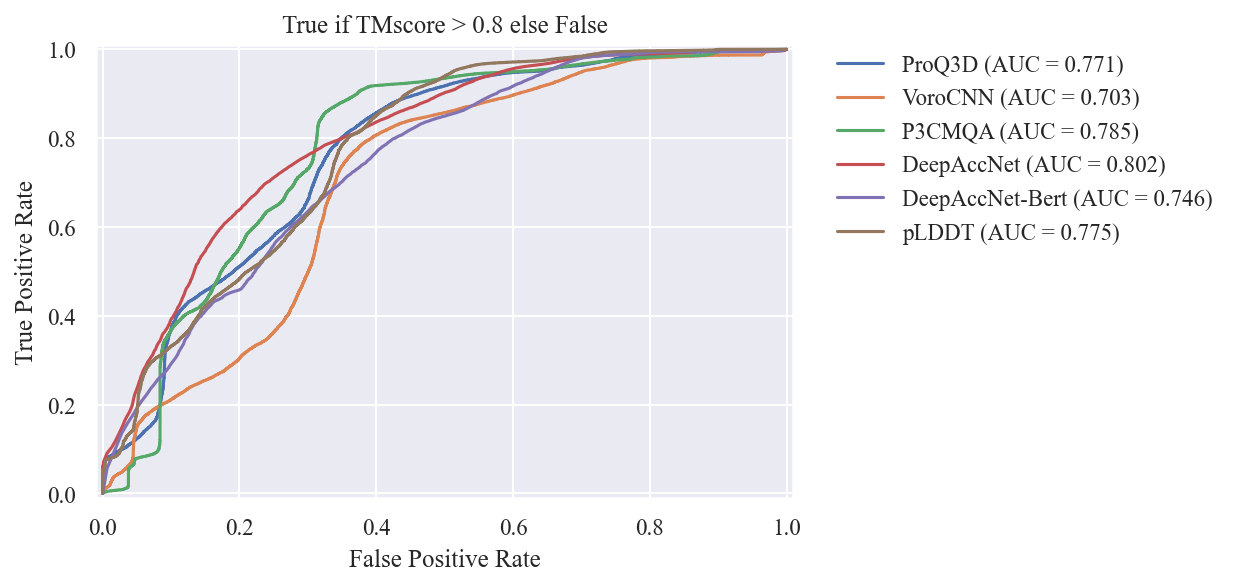

<Figure size 750x600 with 0 Axes>

pTMscore


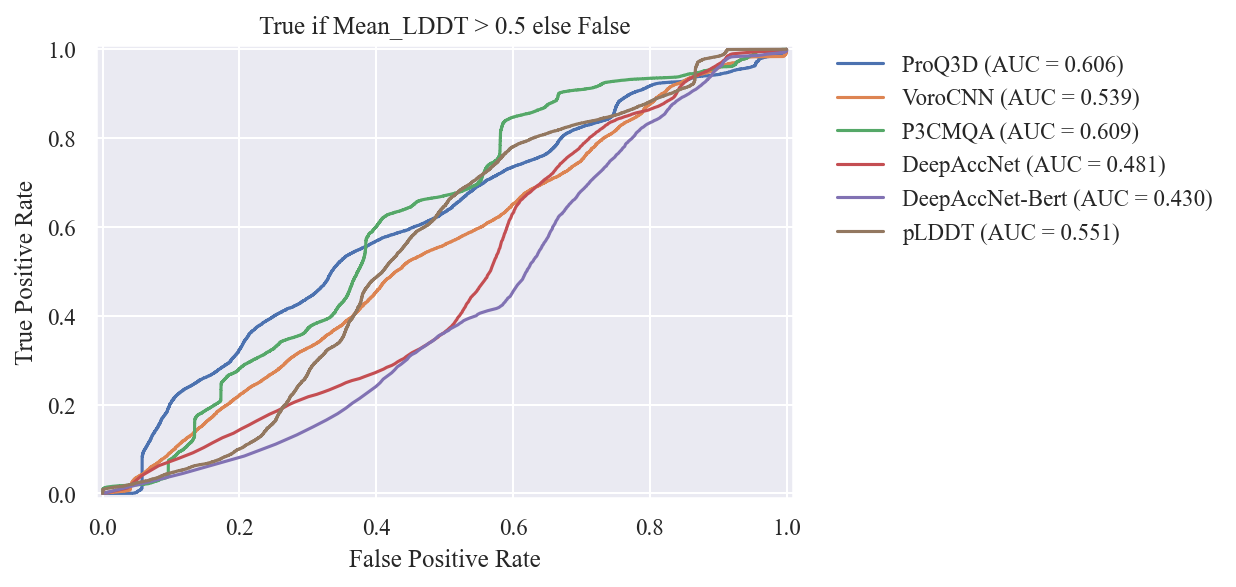

<Figure size 750x600 with 0 Axes>

pTMscore


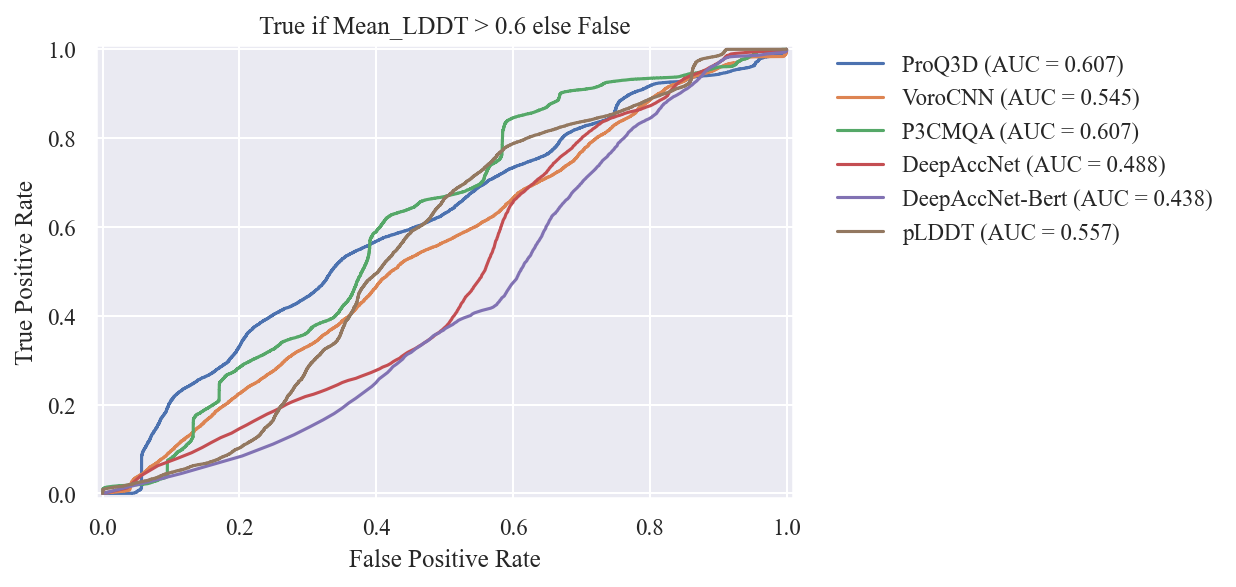

<Figure size 750x600 with 0 Axes>

pTMscore


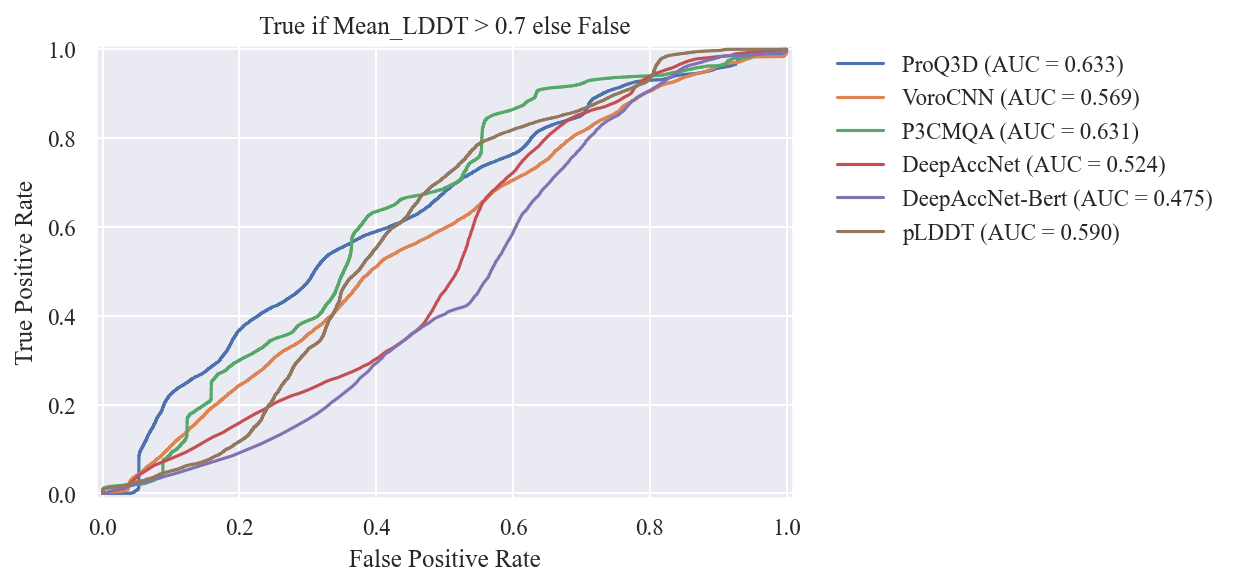

<Figure size 750x600 with 0 Axes>

pTMscore


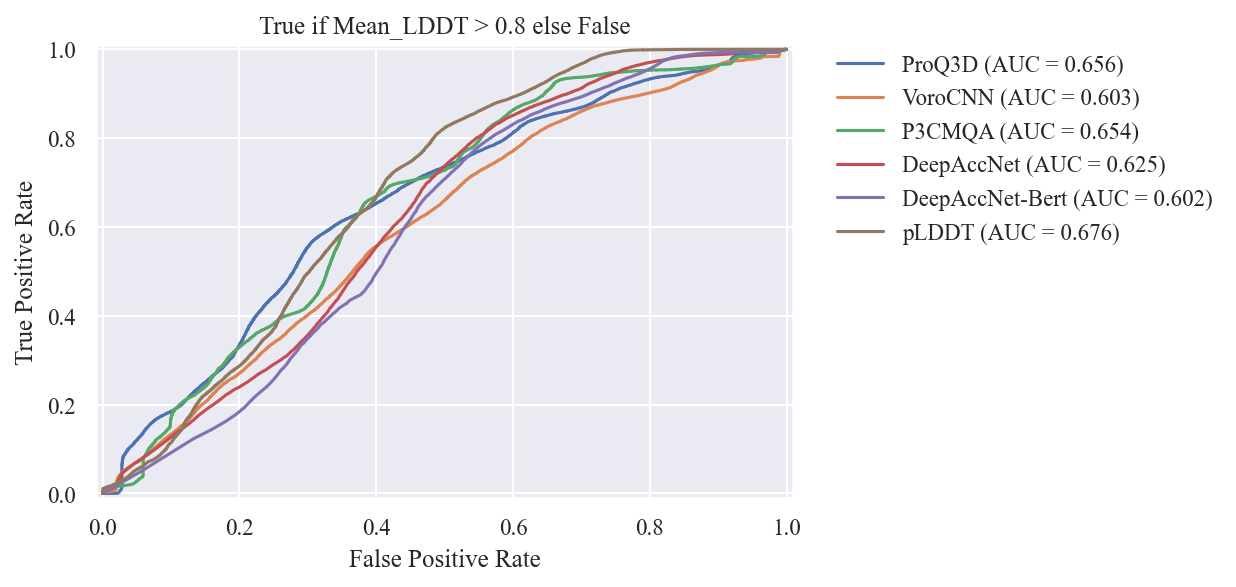

<Figure size 750x600 with 0 Axes>

In [13]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        x = df[l]
        for score in methods:
            y = df[score]
            if y.isna().any():
                print(score)
                continue
            fpr, tpr, thres = roc_curve(x, y)
            a= auc(fpr, tpr)
            plt.title(f'True if {label} > {threshold} else False')
            plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
            plt.legend()
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, facecolor='white', edgecolor='white')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.figure(figsize=(5, 4))
        plt.tight_layout()
        plt.show()

True     52968
False      932
Name: GDT_TS_0.5, dtype: int64


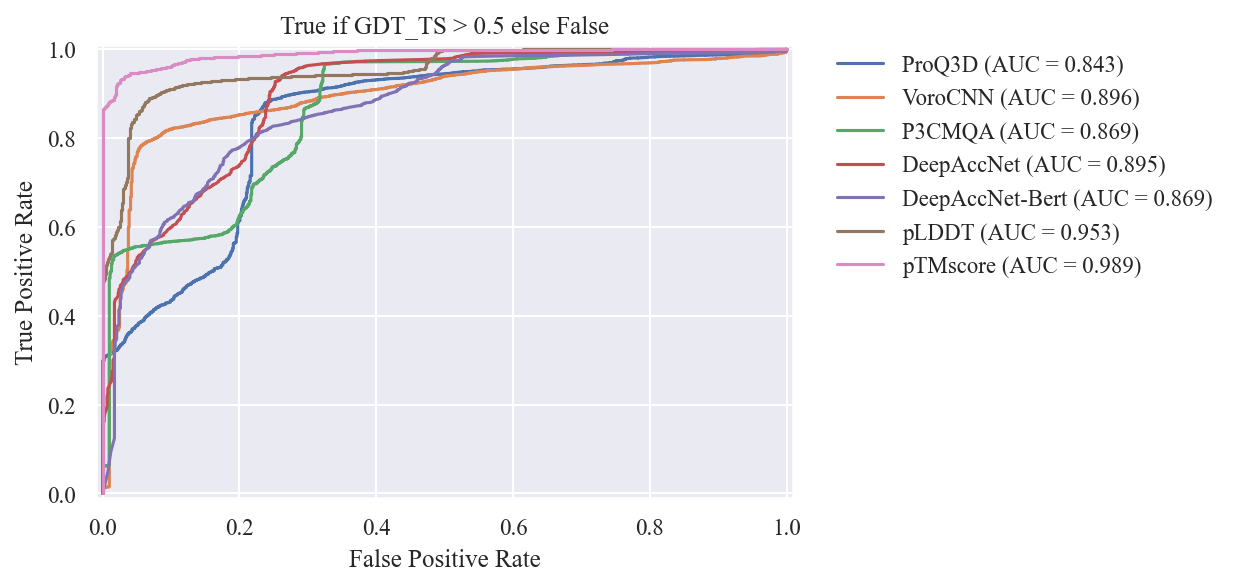

<Figure size 750x600 with 0 Axes>

True     51892
False     2008
Name: GDT_TS_0.6, dtype: int64


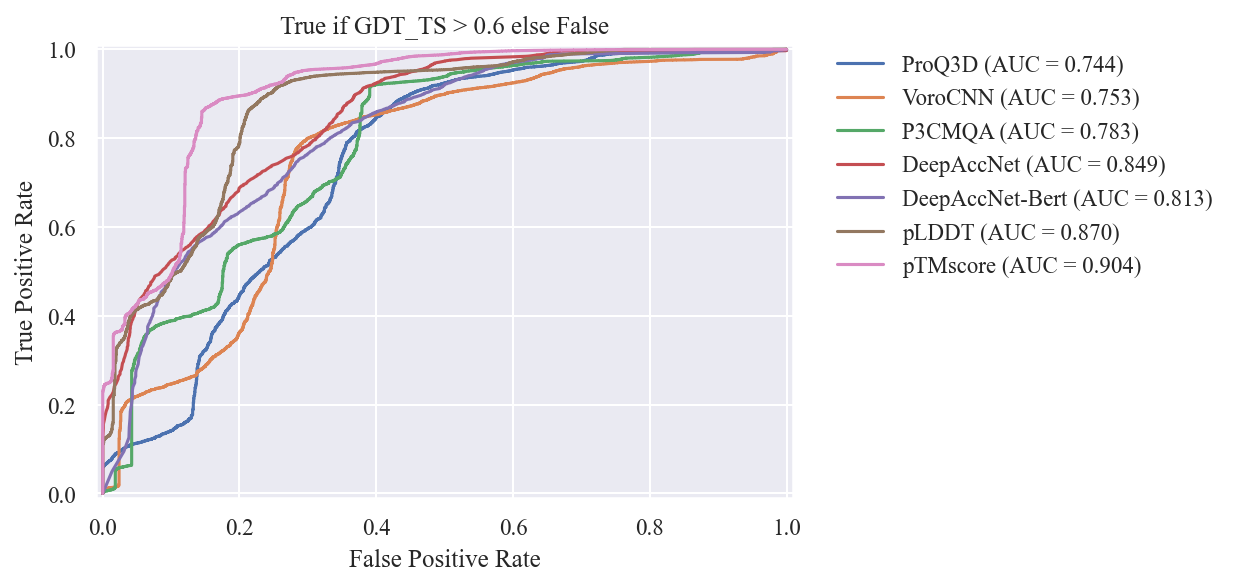

<Figure size 750x600 with 0 Axes>

True     49823
False     4077
Name: GDT_TS_0.7, dtype: int64


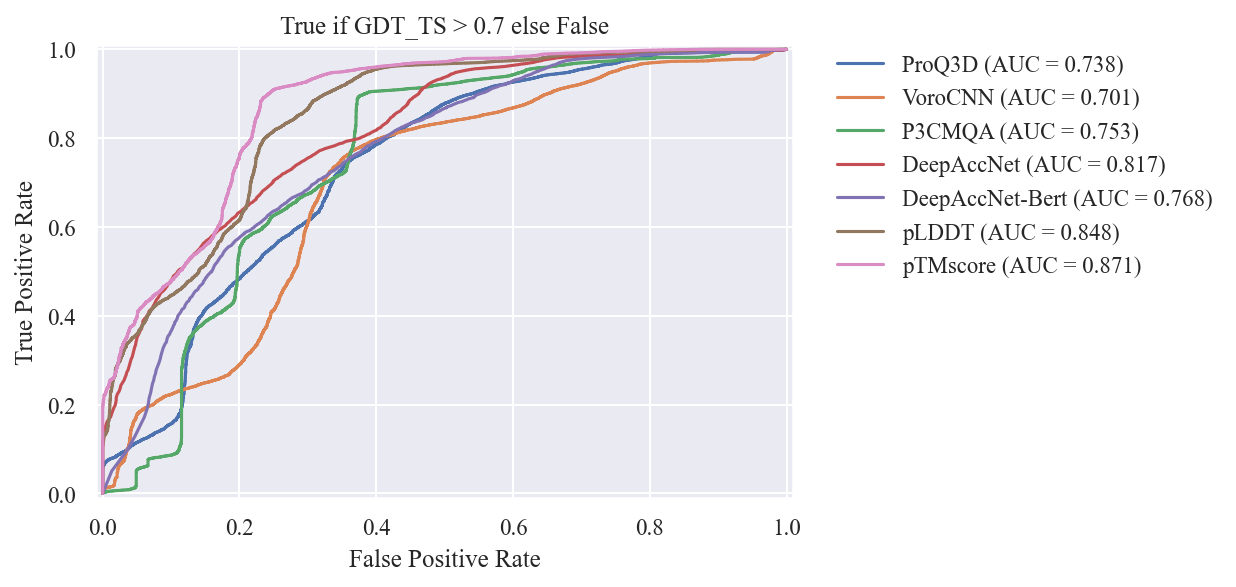

<Figure size 750x600 with 0 Axes>

True     45953
False     7947
Name: GDT_TS_0.8, dtype: int64


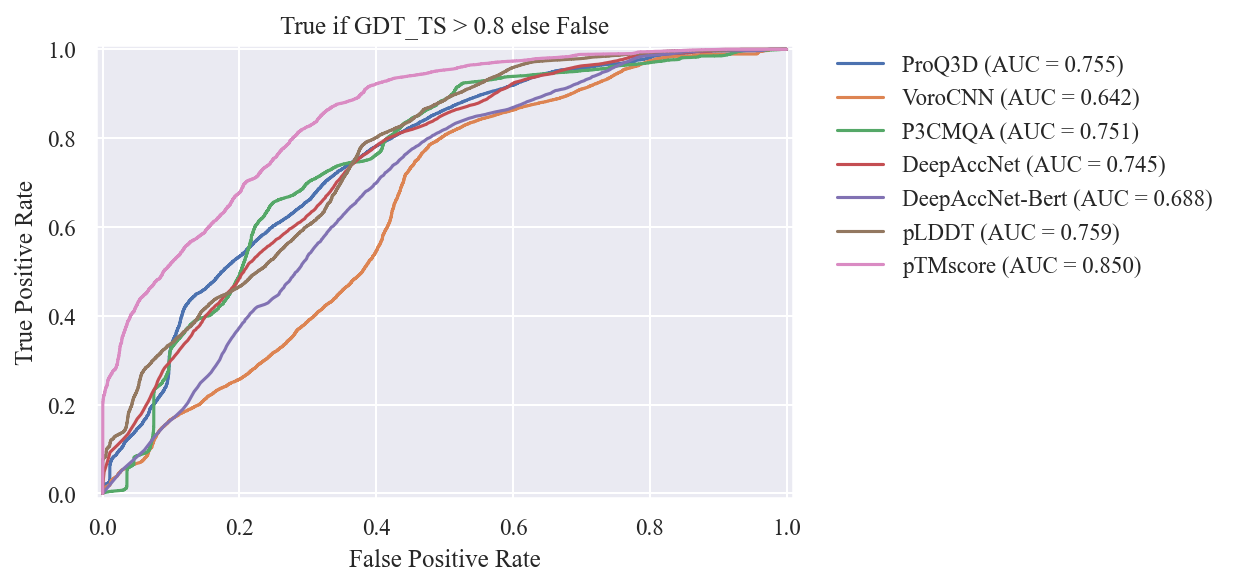

<Figure size 750x600 with 0 Axes>

True     51377
False     2523
Name: GDT_HA_0.5, dtype: int64


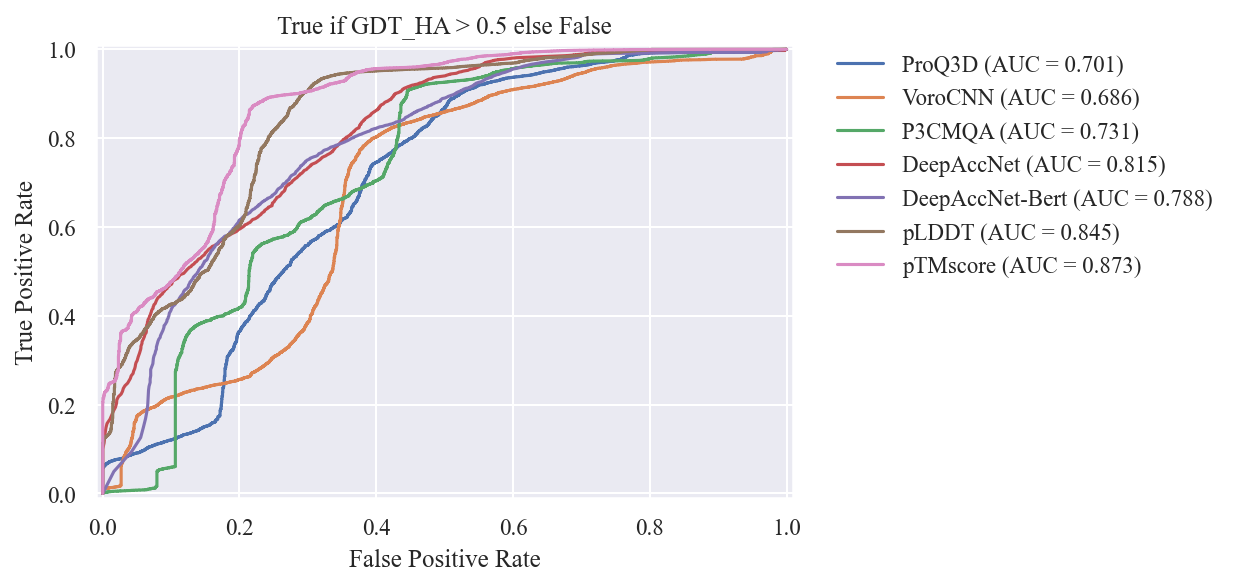

<Figure size 750x600 with 0 Axes>

True     48801
False     5099
Name: GDT_HA_0.6, dtype: int64


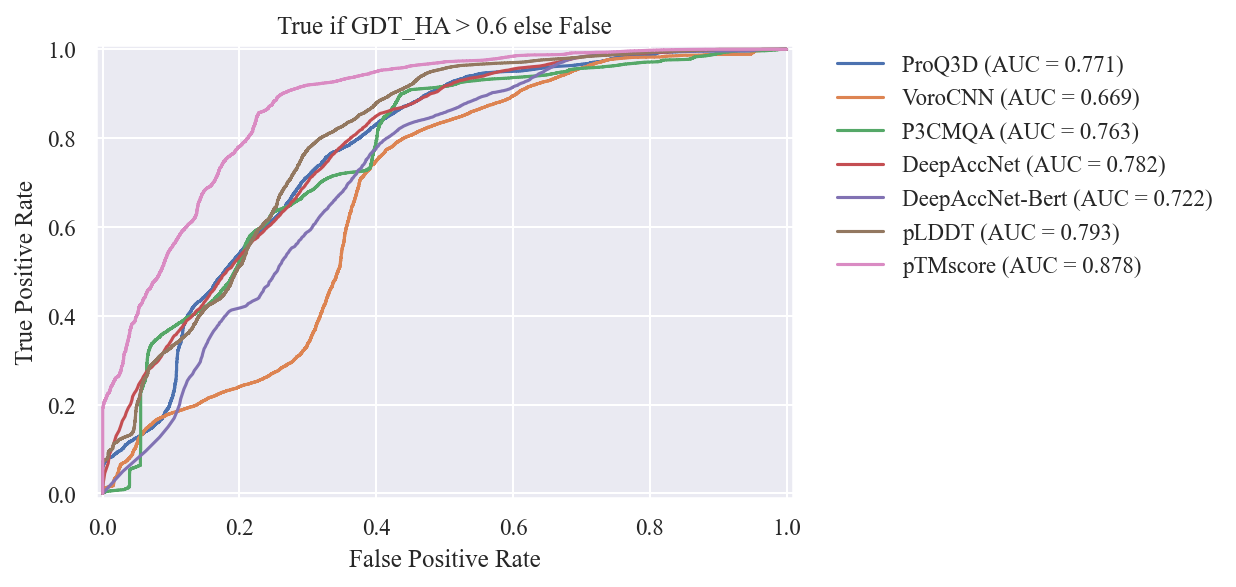

<Figure size 750x600 with 0 Axes>

True     43237
False    10663
Name: GDT_HA_0.7, dtype: int64


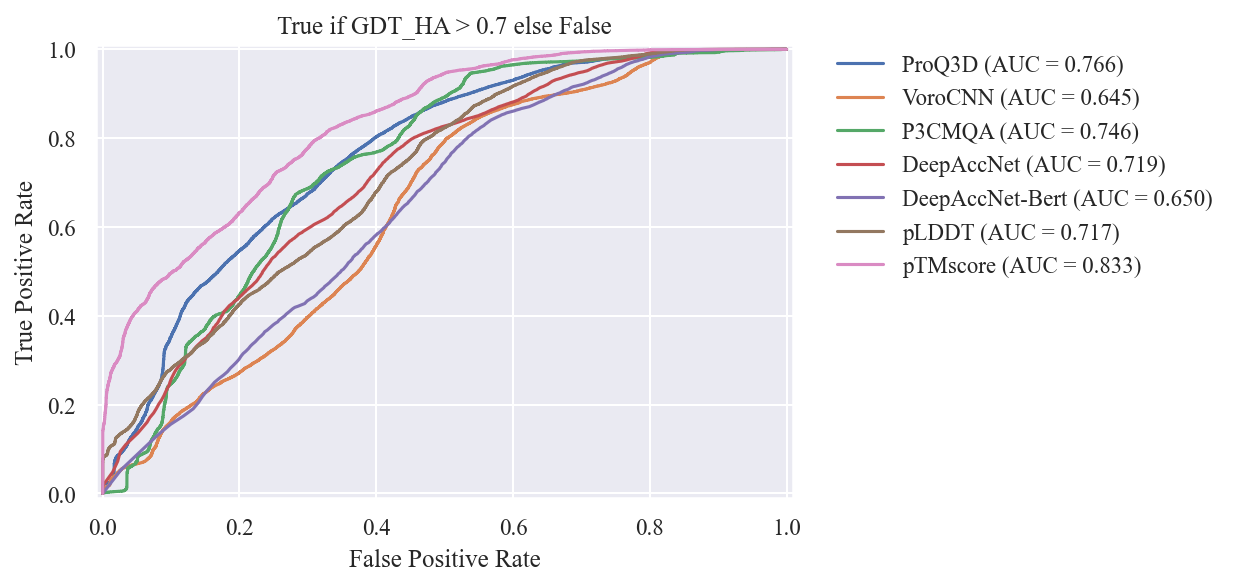

<Figure size 750x600 with 0 Axes>

True     33177
False    20723
Name: GDT_HA_0.8, dtype: int64


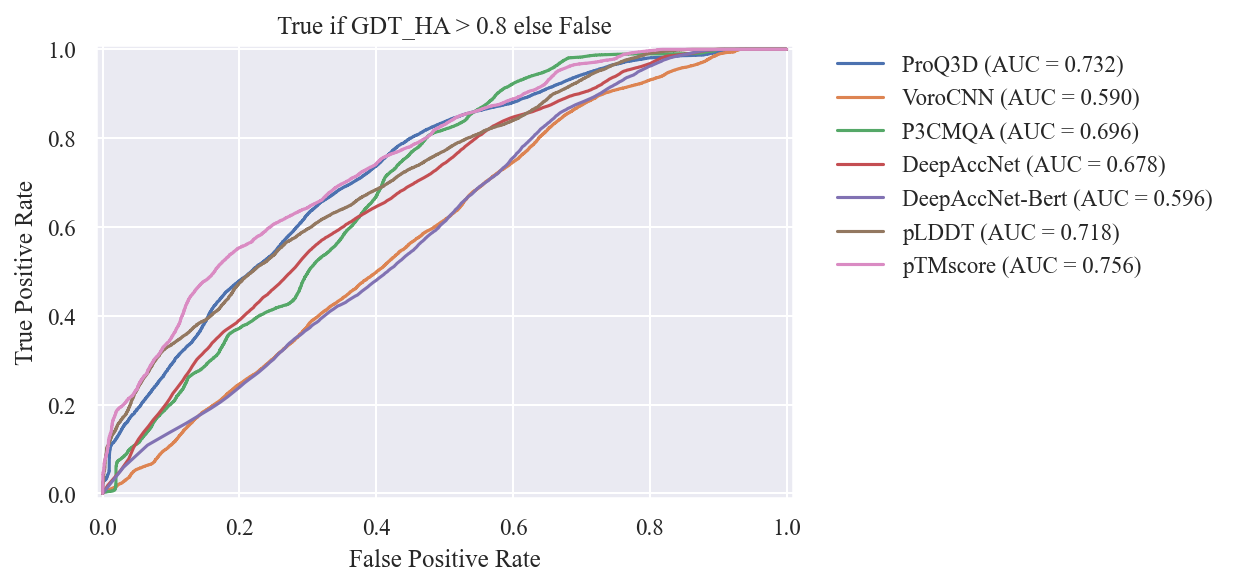

<Figure size 750x600 with 0 Axes>

True     53313
False      587
Name: TMscore_0.5, dtype: int64


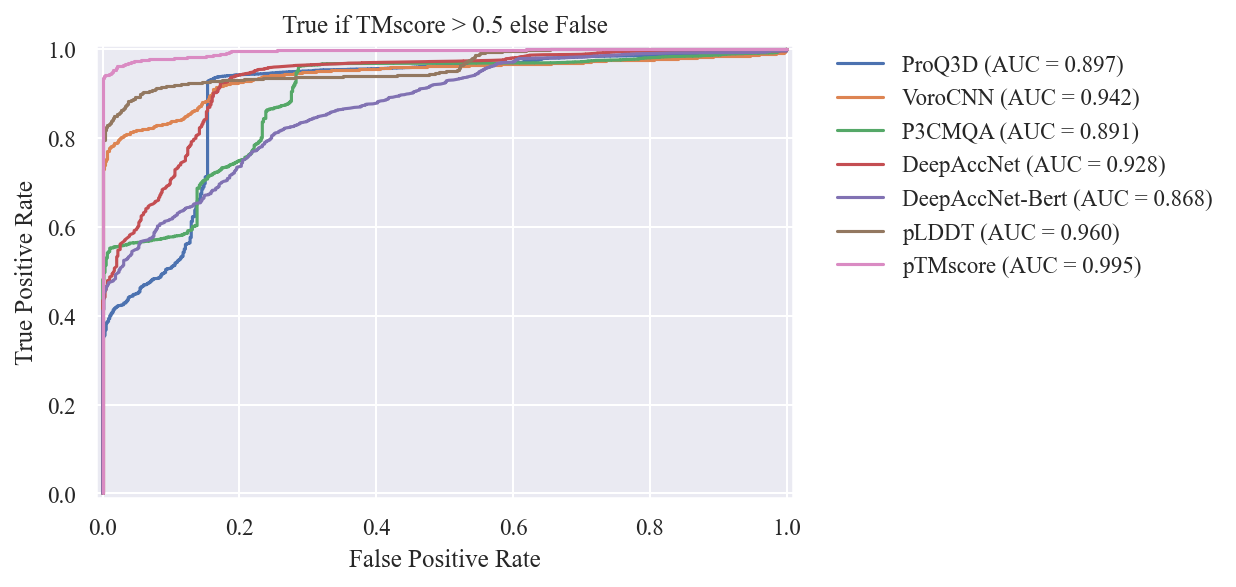

<Figure size 750x600 with 0 Axes>

True     52397
False     1503
Name: TMscore_0.6, dtype: int64


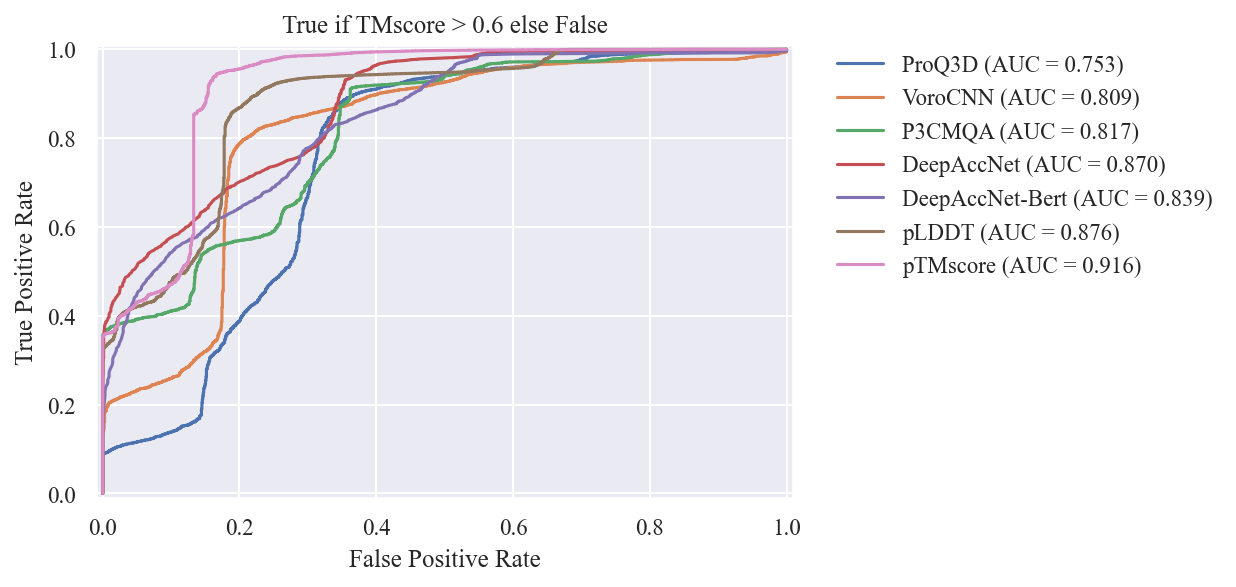

<Figure size 750x600 with 0 Axes>

True     50961
False     2939
Name: TMscore_0.7, dtype: int64


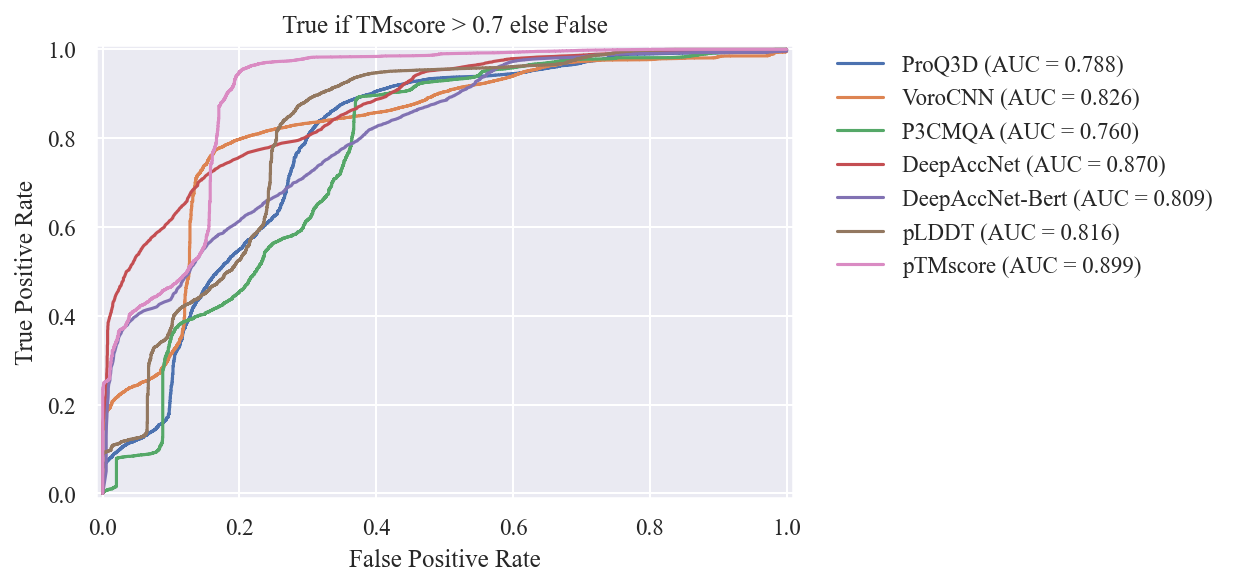

<Figure size 750x600 with 0 Axes>

True     48508
False     5392
Name: TMscore_0.8, dtype: int64


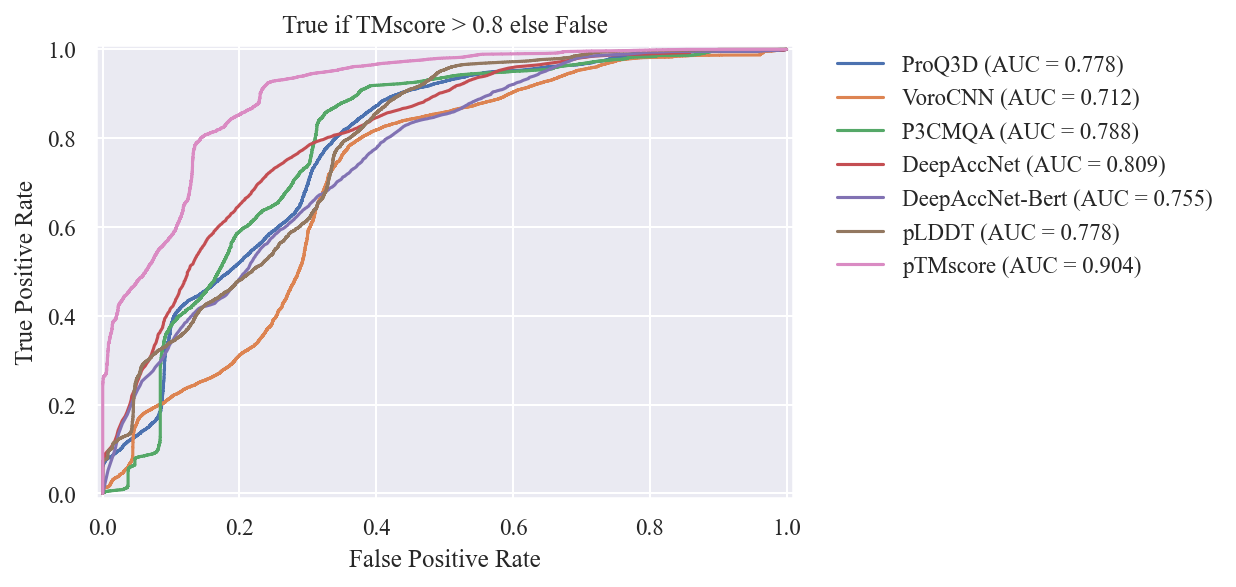

<Figure size 750x600 with 0 Axes>

True     48693
False     5207
Name: Mean_LDDT_0.5, dtype: int64


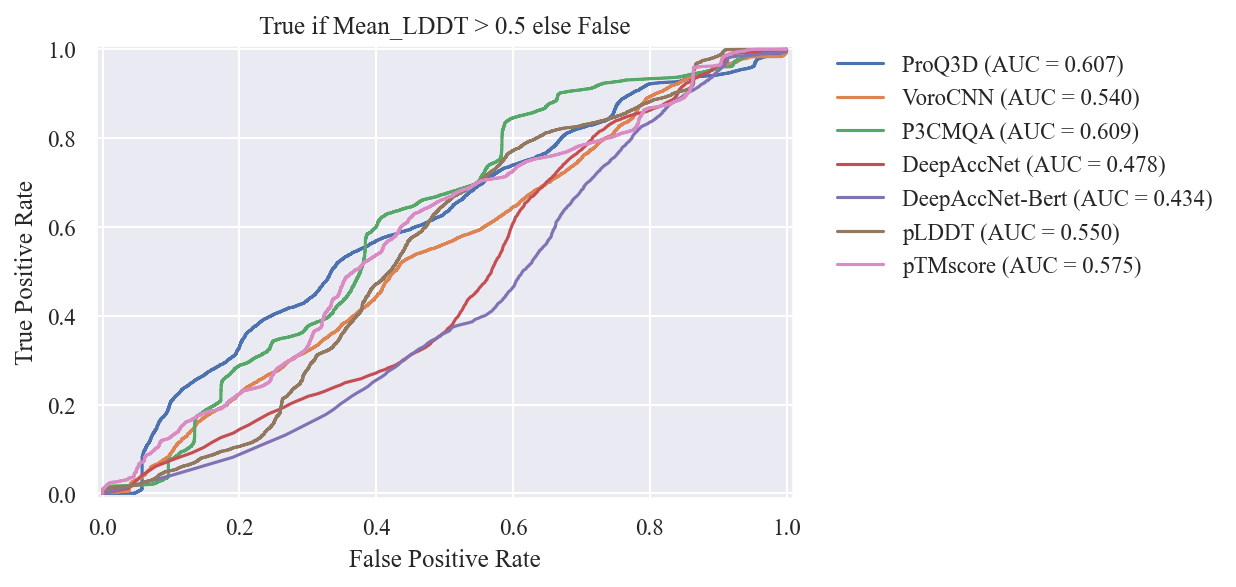

<Figure size 750x600 with 0 Axes>

True     48614
False     5286
Name: Mean_LDDT_0.6, dtype: int64


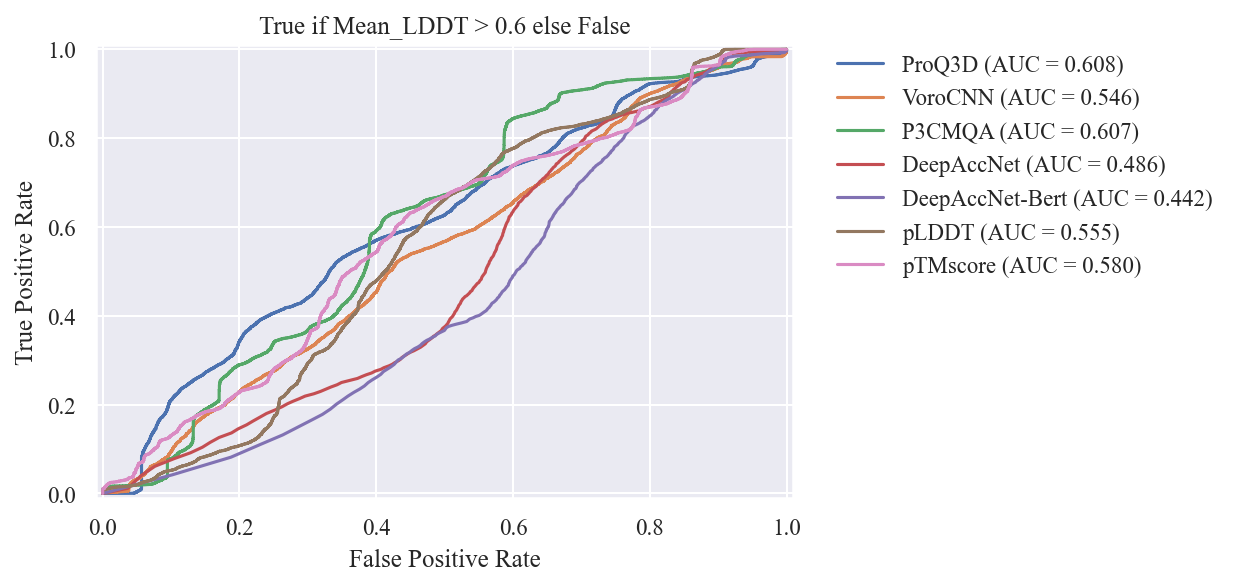

<Figure size 750x600 with 0 Axes>

True     48193
False     5707
Name: Mean_LDDT_0.7, dtype: int64


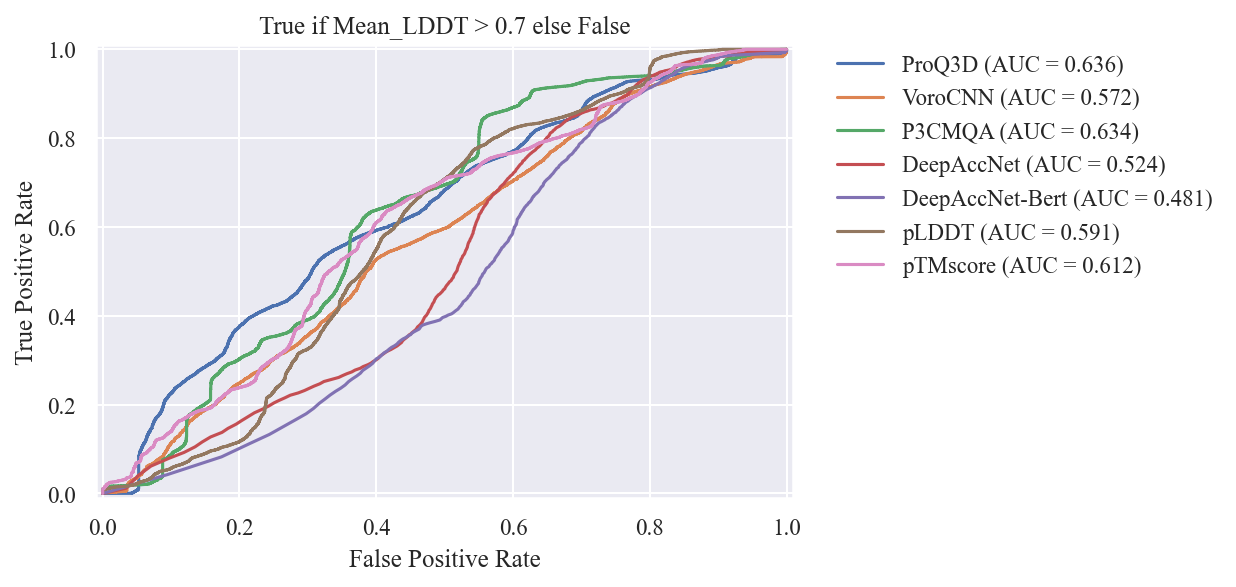

<Figure size 750x600 with 0 Axes>

True     42999
False    10901
Name: Mean_LDDT_0.8, dtype: int64


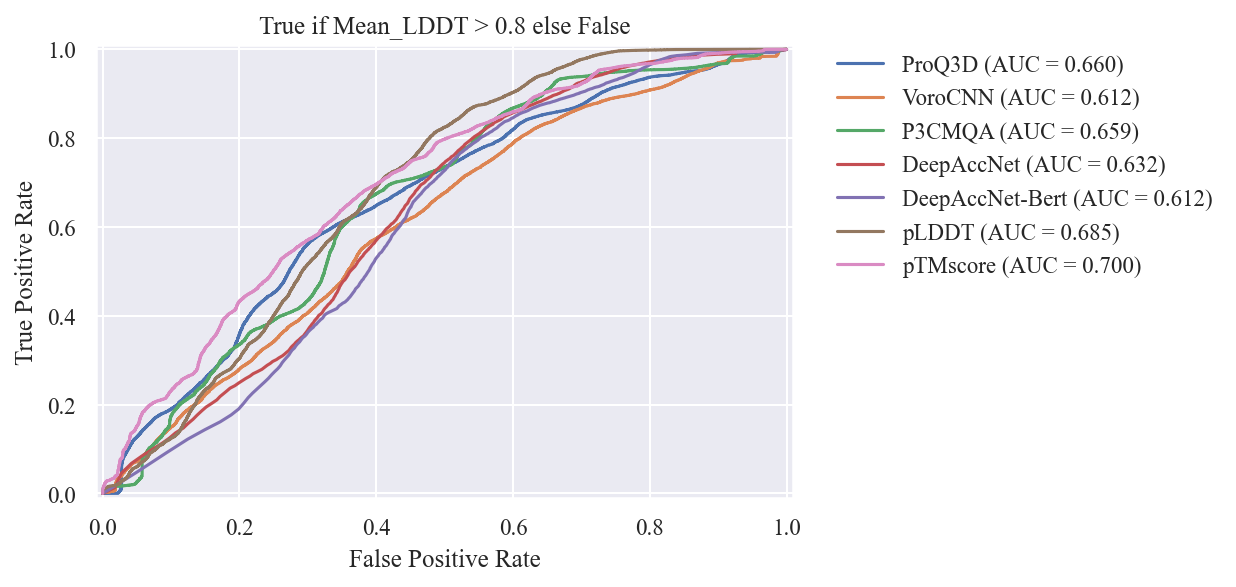

<Figure size 750x600 with 0 Axes>

In [14]:
# For model structures with pTMscore
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
data = df[~df['pTMscore'].isna()]
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        print(data[l].value_counts())
        x = data[l]
        for score in methods:
            y = data[score]
            if y.isna().any():
                print(score)
                continue
            fpr, tpr, thres = roc_curve(x, y)
            a= auc(fpr, tpr)
            plt.title(f'True if {label} > {threshold} else False')
            plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
            plt.legend()
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, facecolor='white', edgecolor='white')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.figure(figsize=(5, 4))
        plt.tight_layout()
        plt.show()

## Case 2: Negative examples are structures whose label value is lower than the maximum label value by more than threshold

In [15]:
# Against gdtts
mqa_methods = ['DOPE', 'SOAP', 'ProQ3D', 'SBROD', 'VoroCNN', 'P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert']
methods = mqa_methods + ['pLDDT', 'pTMscore']

In [16]:
def split_tf_in_target(group: pd.DataFrame, label: str, threshold: float):
    """False for structures that are a threshold value away from the maximum label value in the target

    Args:
        group (pd.DataFrame): DataFrame of a target.
        label (str, optional): label name. Defaults to 'GDT_TS'.
        threshold (float, optional): Threshold. Defaults to 0.05.
    """
    max_value = group[label].max()
    l = f'{label}-{threshold}'
    group[l] = group[label] + threshold > max_value
    if group[l].all():
        return None
    return group
label = 'GDT_TS'
threshold = 0.05
rel_df = df.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
l = f'{label}-{threshold}'
print(rel_df[l].value_counts())
print(rel_df['Target'].unique().size)

True     21957
False    13243
Name: GDT_TS-0.05, dtype: int64
99


In [17]:
results = []
for method in methods:
    aucs = []
    for name, group in rel_df.groupby('Target'):
        if group[method].isna().any():
                continue
        fpr, tpr, thres = roc_curve(group[l], group[method])
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)
    results.append({'Method': method, 'AUC': np.mean(aucs)})
pd.DataFrame(results)

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Method   AUC
0             DOPE 0.639
1             SOAP 0.658
2           ProQ3D 0.568
3            SBROD 0.494
4          VoroCNN 0.607
5           P3CMQA 0.598
6       DeepAccNet 0.653
7  DeepAccNet-Bert 0.636
8            pLDDT 0.664
9         pTMscore   NaN

<ipython-input-18-abb77afe1127>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Label'] = sample_df[f'{label}-{threshold}']
<ipython-input-18-abb77afe1127>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Label'] = sample_df['Label'].astype(str)


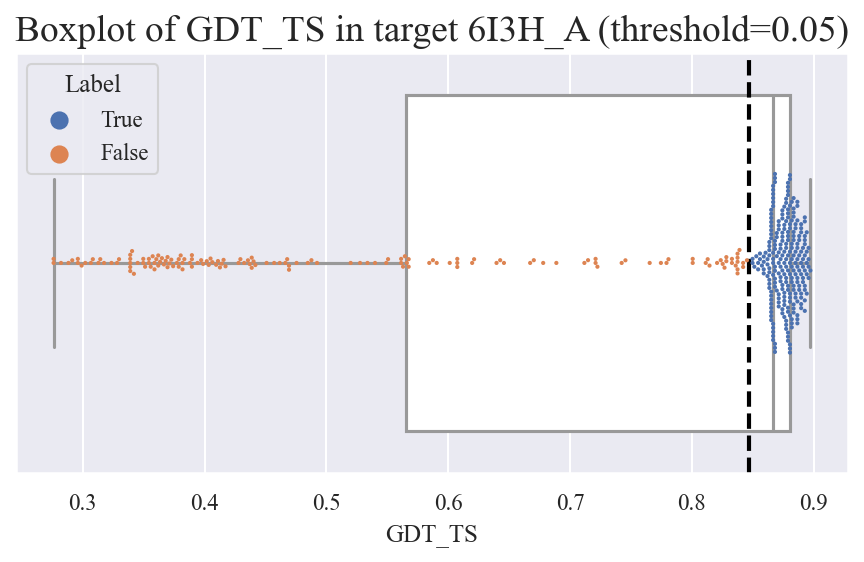

In [18]:
# sample_target = df['Target'].unique()[77]
sample_target = '6I3H_A'
threshold = 0.05
sample_df = rel_df[rel_df['Target'] == sample_target]
label = 'GDT_TS'
sample_df['Label'] = sample_df[f'{label}-{threshold}']
sample_df['Label'] = sample_df['Label'].astype(str)
sns.boxplot(data=sample_df, x=label, color='white')
sns.swarmplot(data=sample_df, x=label, s=2, hue='Label', y=[''] * len(sample_df), hue_order=['True', 'False'])
x = sample_df[label].max() - threshold
plt.axvline(x=x, color='black', linestyle='--', linewidth=2)
plt.title(f'Boxplot of GDT_TS in target {sample_target} (threshold={threshold})', fontsize=18)
plt.tight_layout()

### For all structures

GDT_TS 0.05
True     21957
False    13243
Name: GDT_TS-0.05, dtype: int64
99


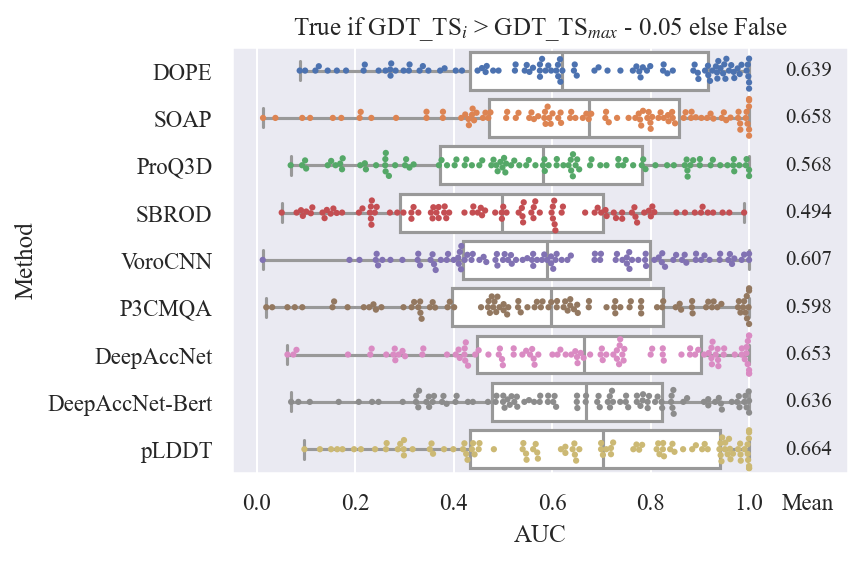

AUC
Method               
DOPE            0.639
DeepAccNet      0.653
DeepAccNet-Bert 0.636
P3CMQA          0.598
ProQ3D          0.568
SBROD           0.494
SOAP            0.658
VoroCNN         0.607
pLDDT           0.664

GDT_TS 0.1
True     8723
False    4877
Name: GDT_TS-0.1, dtype: int64
39


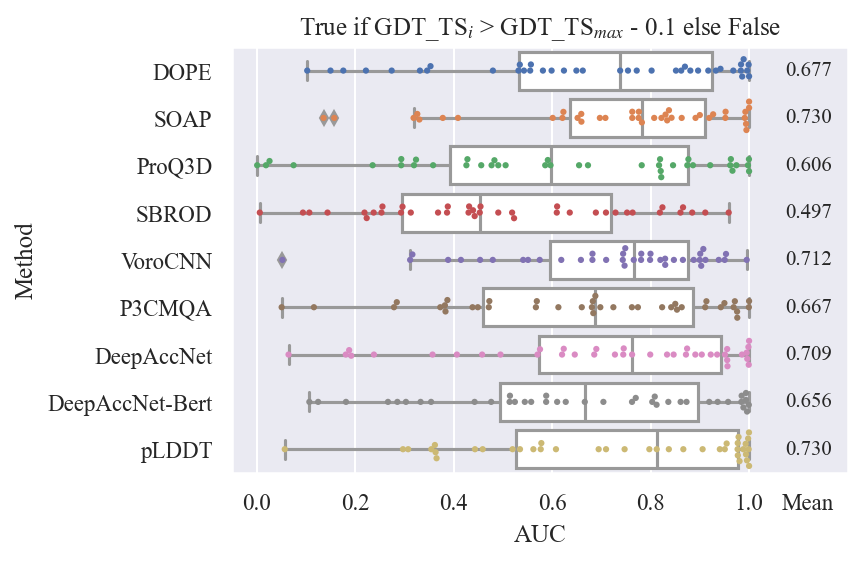

AUC
Method               
DOPE            0.677
DeepAccNet      0.709
DeepAccNet-Bert 0.656
P3CMQA          0.667
ProQ3D          0.606
SBROD           0.497
SOAP            0.730
VoroCNN         0.712
pLDDT           0.730

GDT_TS 0.15
True     6951
False    2449
Name: GDT_TS-0.15, dtype: int64
28


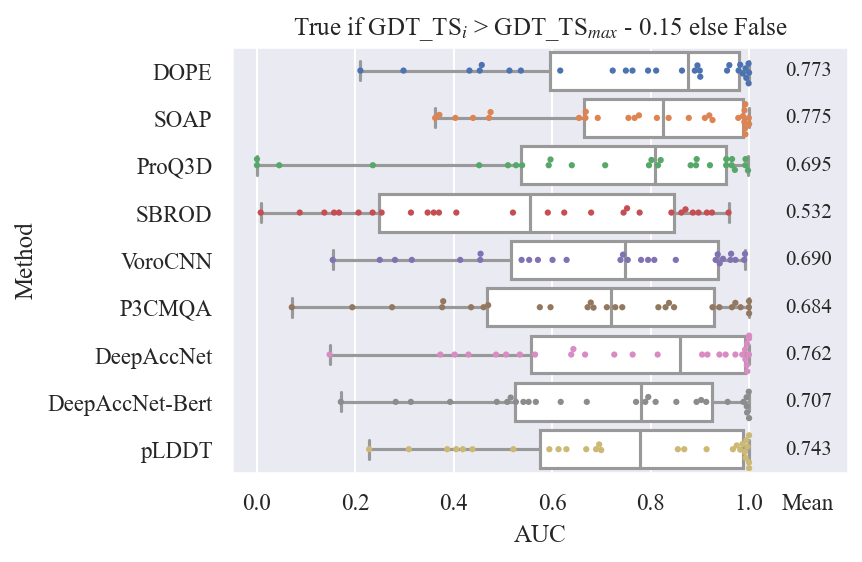

AUC
Method               
DOPE            0.773
DeepAccNet      0.762
DeepAccNet-Bert 0.707
P3CMQA          0.684
ProQ3D          0.695
SBROD           0.532
SOAP            0.775
VoroCNN         0.690
pLDDT           0.743

GDT_TS 0.2
True     4606
False    1594
Name: GDT_TS-0.2, dtype: int64
18


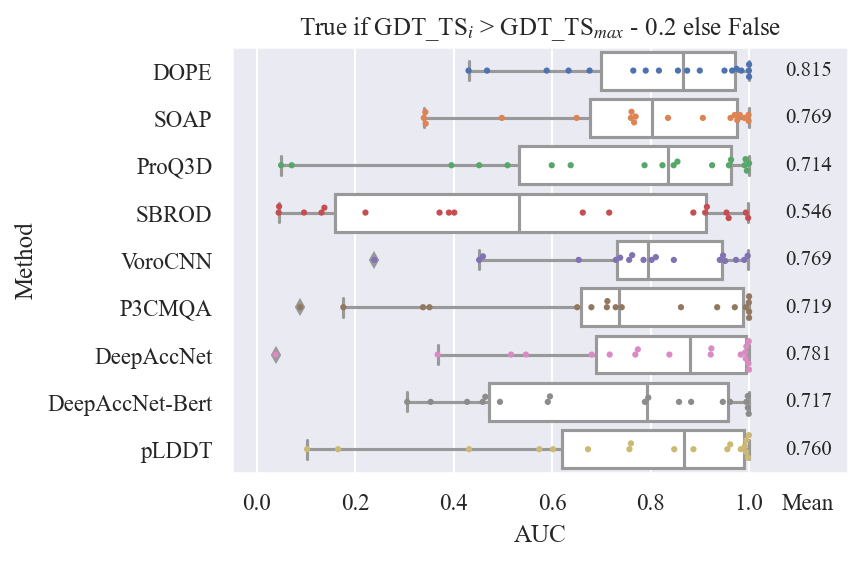

AUC
Method               
DOPE            0.815
DeepAccNet      0.781
DeepAccNet-Bert 0.717
P3CMQA          0.719
ProQ3D          0.714
SBROD           0.546
SOAP            0.769
VoroCNN         0.769
pLDDT           0.760

GDT_HA 0.05
True     47610
False    19990
Name: GDT_HA-0.05, dtype: int64
190


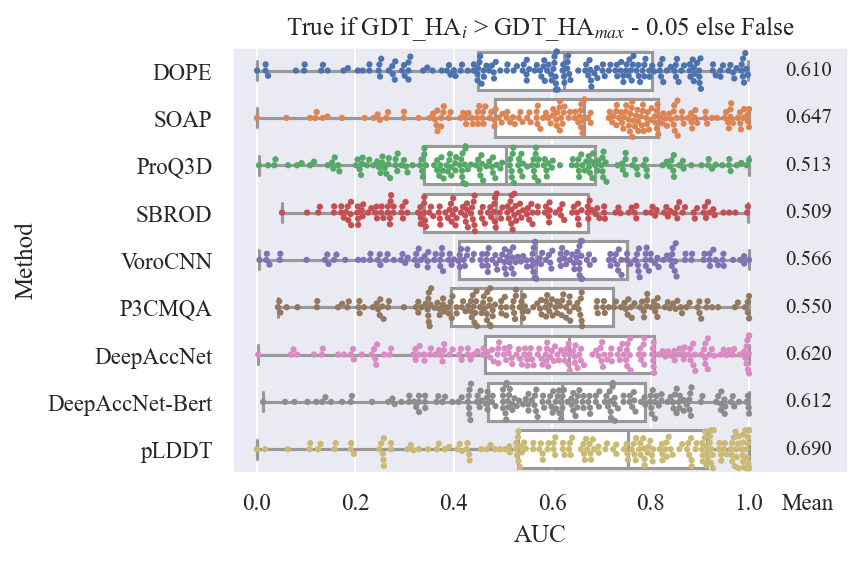

AUC
Method               
DOPE            0.610
DeepAccNet      0.620
DeepAccNet-Bert 0.612
P3CMQA          0.550
ProQ3D          0.513
SBROD           0.509
SOAP            0.647
VoroCNN         0.566
pLDDT           0.690

GDT_HA 0.1
True     17672
False     5928
Name: GDT_HA-0.1, dtype: int64
67


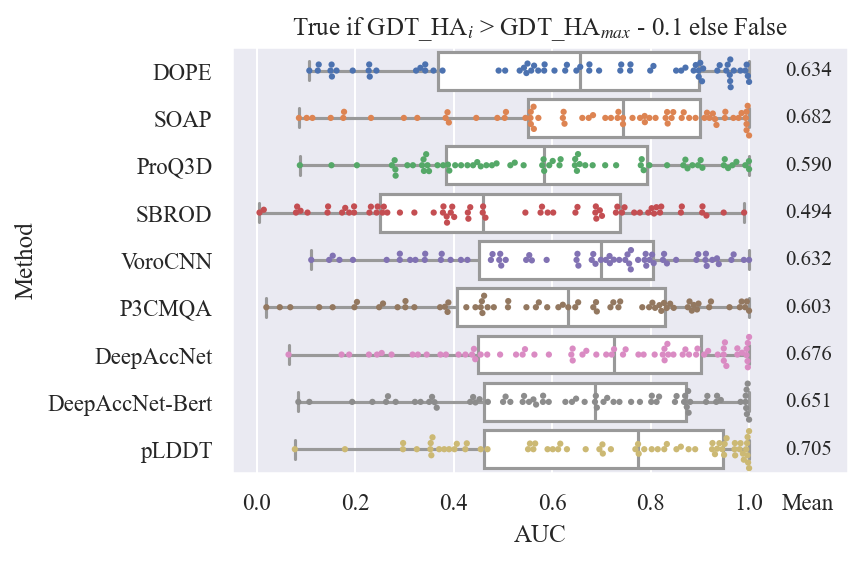

AUC
Method               
DOPE            0.634
DeepAccNet      0.676
DeepAccNet-Bert 0.651
P3CMQA          0.603
ProQ3D          0.590
SBROD           0.494
SOAP            0.682
VoroCNN         0.632
pLDDT           0.705

GDT_HA 0.15
True     8668
False    2732
Name: GDT_HA-0.15, dtype: int64
33


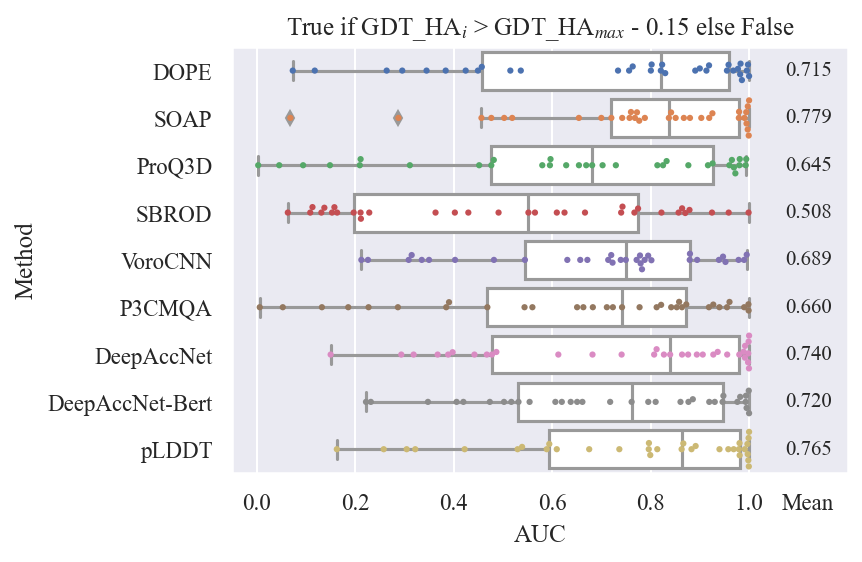

AUC
Method               
DOPE            0.715
DeepAccNet      0.740
DeepAccNet-Bert 0.720
P3CMQA          0.660
ProQ3D          0.645
SBROD           0.508
SOAP            0.779
VoroCNN         0.689
pLDDT           0.765

GDT_HA 0.2
True     5178
False    1822
Name: GDT_HA-0.2, dtype: int64
20


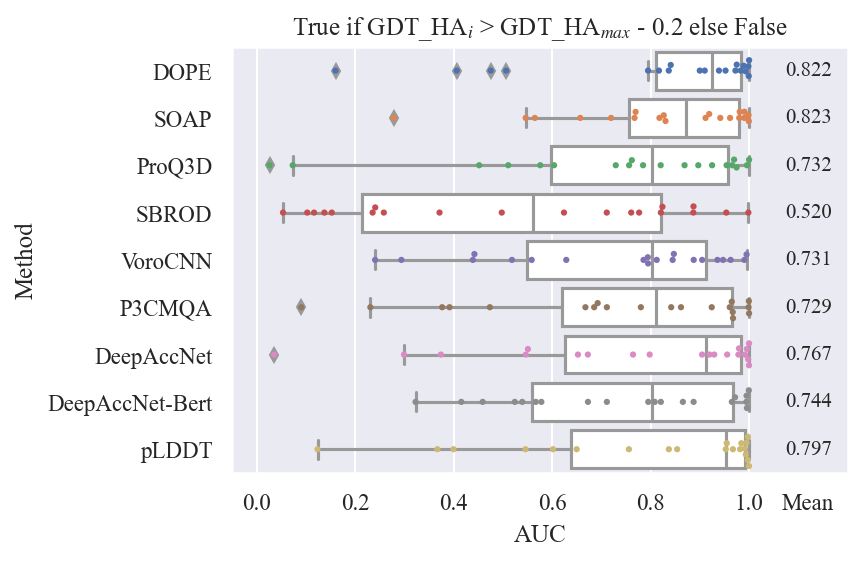

AUC
Method               
DOPE            0.822
DeepAccNet      0.767
DeepAccNet-Bert 0.744
P3CMQA          0.729
ProQ3D          0.732
SBROD           0.520
SOAP            0.823
VoroCNN         0.731
pLDDT           0.797

TMscore 0.05
True     12060
False     9540
Name: TMscore-0.05, dtype: int64
59


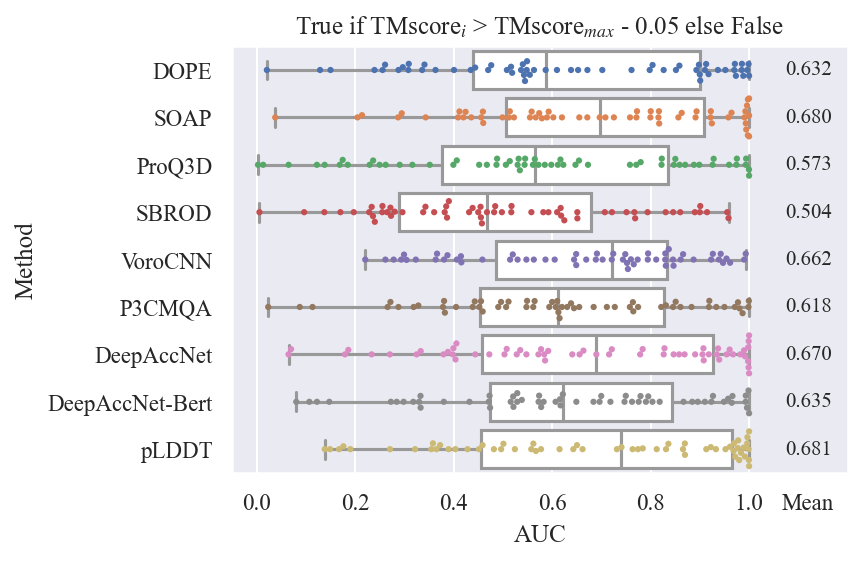

AUC
Method               
DOPE            0.632
DeepAccNet      0.670
DeepAccNet-Bert 0.635
P3CMQA          0.618
ProQ3D          0.573
SBROD           0.504
SOAP            0.680
VoroCNN         0.662
pLDDT           0.681

TMscore 0.1
True     7156
False    4244
Name: TMscore-0.1, dtype: int64
33


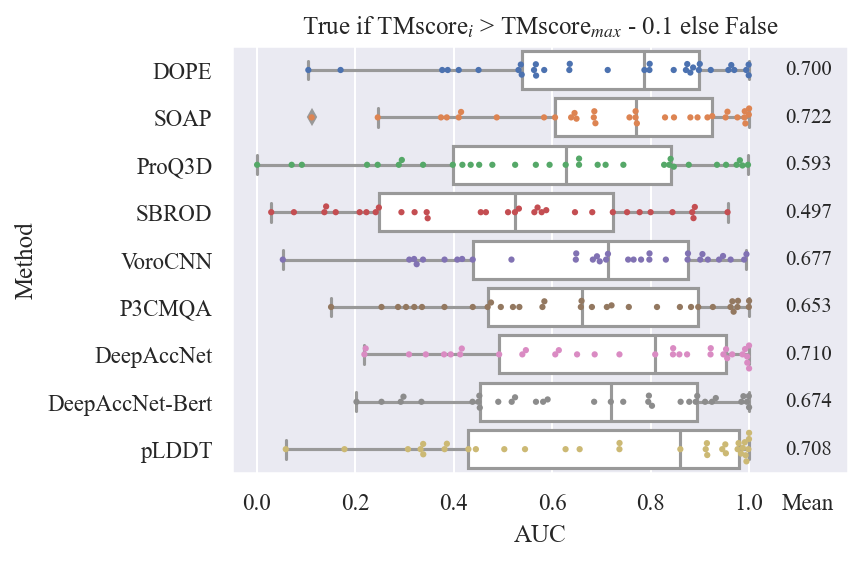

AUC
Method               
DOPE            0.700
DeepAccNet      0.710
DeepAccNet-Bert 0.674
P3CMQA          0.653
ProQ3D          0.593
SBROD           0.497
SOAP            0.722
VoroCNN         0.677
pLDDT           0.708

TMscore 0.15
True     6038
False    2362
Name: TMscore-0.15, dtype: int64
24


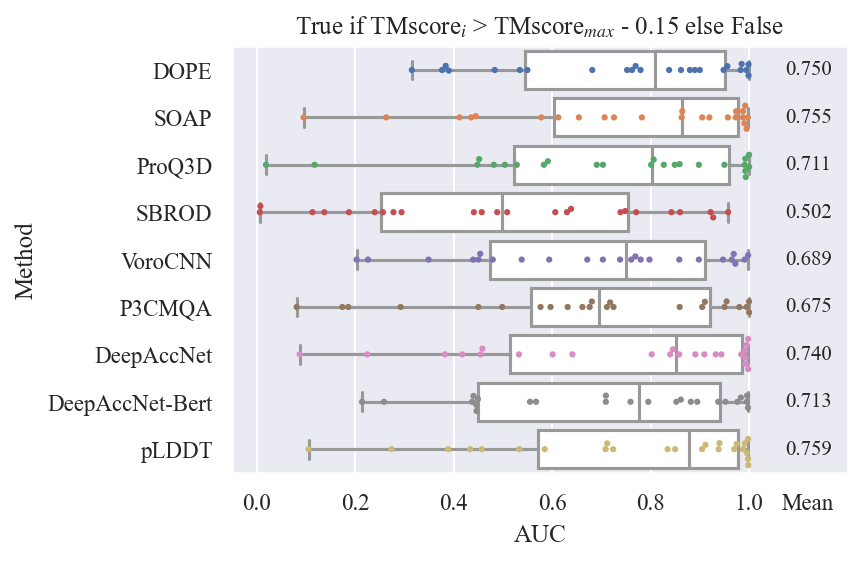

AUC
Method               
DOPE            0.750
DeepAccNet      0.740
DeepAccNet-Bert 0.713
P3CMQA          0.675
ProQ3D          0.711
SBROD           0.502
SOAP            0.755
VoroCNN         0.689
pLDDT           0.759

TMscore 0.2
True     4253
False    1547
Name: TMscore-0.2, dtype: int64
17


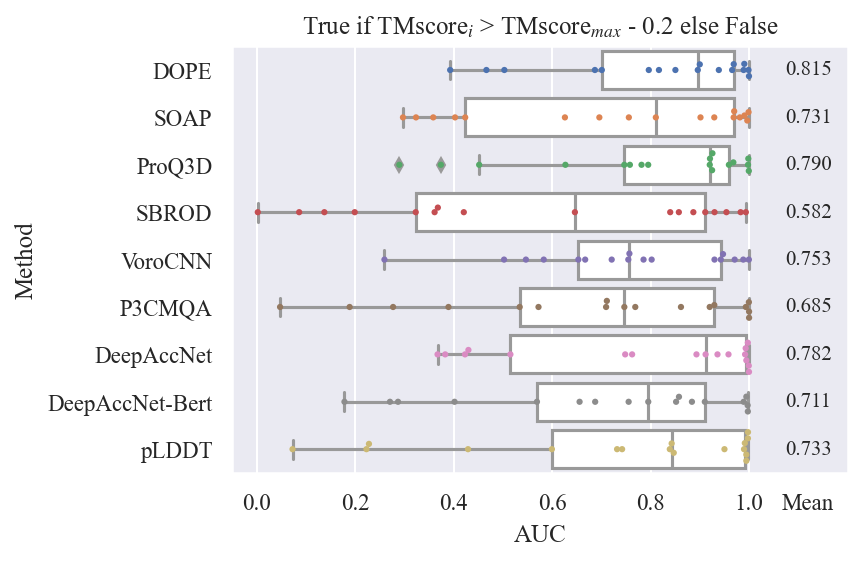

AUC
Method               
DOPE            0.815
DeepAccNet      0.782
DeepAccNet-Bert 0.711
P3CMQA          0.685
ProQ3D          0.790
SBROD           0.582
SOAP            0.731
VoroCNN         0.753
pLDDT           0.733

In [19]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore']
thresholds = [0.05, 0.1, 0.15, 0.2]
for label in labels:
    for threshold in thresholds:
        rel_df = df.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
        l = f'{label}-{threshold}'
        print(label, threshold)
        print(rel_df[l].value_counts())
        print(rel_df['Target'].unique().size)
        results = []
        for method in methods:
            aucs = []
            targets = []
            for name, group in rel_df.groupby('Target'):
                if group[method].isna().any():
                    continue
                fpr, tpr, thres = roc_curve(group[l], group[method])
                auc_score = auc(fpr, tpr)
                aucs.append(auc_score)
                targets.append(name)
            if len(aucs) == 0:
                continue
            results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
        cdf = pd.concat(results)
        plt.title(f'True if {label}$_{{i}}$ > {label}$_{{max}}$ - {threshold} else False')
        sns.boxplot(data=cdf, y='Method', x='AUC', color='white')
        sns.swarmplot(data=cdf, y='Method', x='AUC', s=3)
        xticks_max = 1.12
        plt.xlim(-0.05, 1.2)
        xticks = np.append(np.arange(0, 1.2, 0.2), [xticks_max])
        xticks_str = list(map(lambda x: f'{x:.1f}', xticks))
        xticks_str[-1] = 'Mean'
        plt.xticks(xticks, xticks_str)
        plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
        mean_series = cdf.groupby('Method').mean()['AUC']
        for i, method in enumerate(methods):
            if method not in mean_series.index:
                continue
            value = mean_series[method]
            plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
        plt.tight_layout()
        plt.show()
        display(cdf.groupby('Method').mean())

### For structures with pTMscore

GDT_TS 0.05
True     9808
False    5492
Name: GDT_TS-0.05, dtype: int64
87


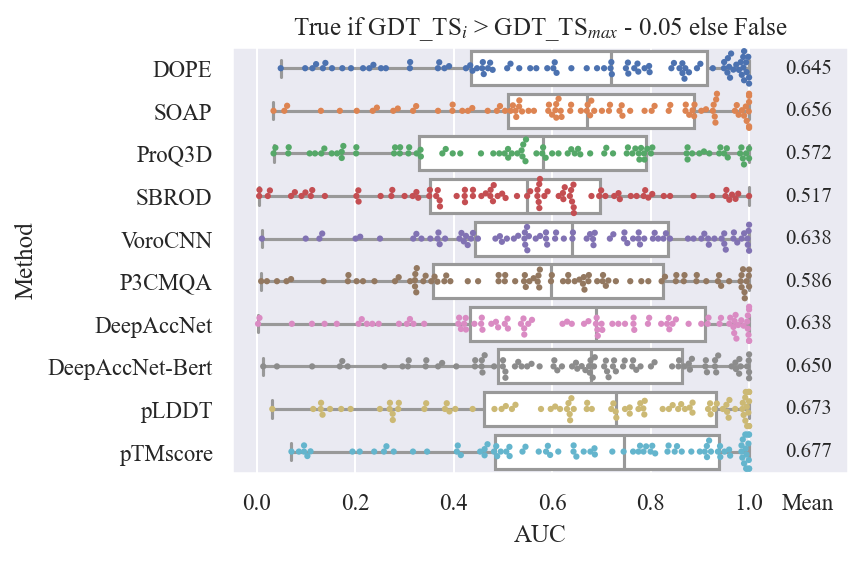

AUC
Method               
DOPE            0.645
DeepAccNet      0.638
DeepAccNet-Bert 0.650
P3CMQA          0.586
ProQ3D          0.572
SBROD           0.517
SOAP            0.656
VoroCNN         0.638
pLDDT           0.673
pTMscore        0.677

GDT_TS 0.1
True     3418
False    2082
Name: GDT_TS-0.1, dtype: int64
32


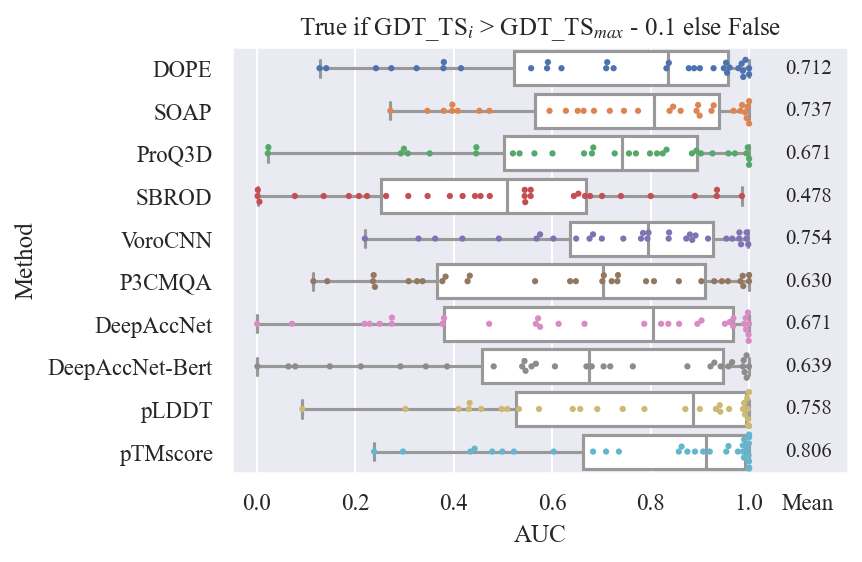

AUC
Method               
DOPE            0.712
DeepAccNet      0.671
DeepAccNet-Bert 0.639
P3CMQA          0.630
ProQ3D          0.671
SBROD           0.478
SOAP            0.737
VoroCNN         0.754
pLDDT           0.758
pTMscore        0.806

GDT_TS 0.15
True     3045
False    1255
Name: GDT_TS-0.15, dtype: int64
26


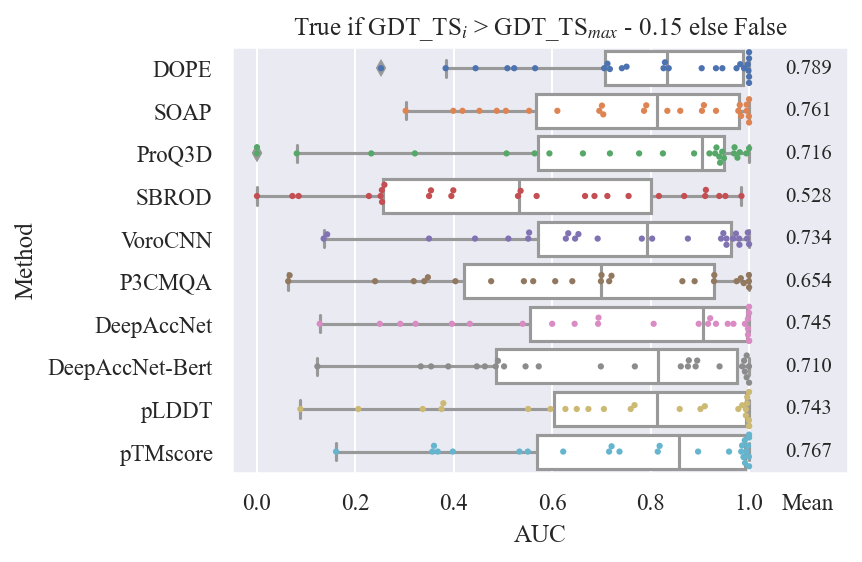

AUC
Method               
DOPE            0.789
DeepAccNet      0.745
DeepAccNet-Bert 0.710
P3CMQA          0.654
ProQ3D          0.716
SBROD           0.528
SOAP            0.761
VoroCNN         0.734
pLDDT           0.743
pTMscore        0.767

GDT_TS 0.2
True     1594
False     806
Name: GDT_TS-0.2, dtype: int64
14


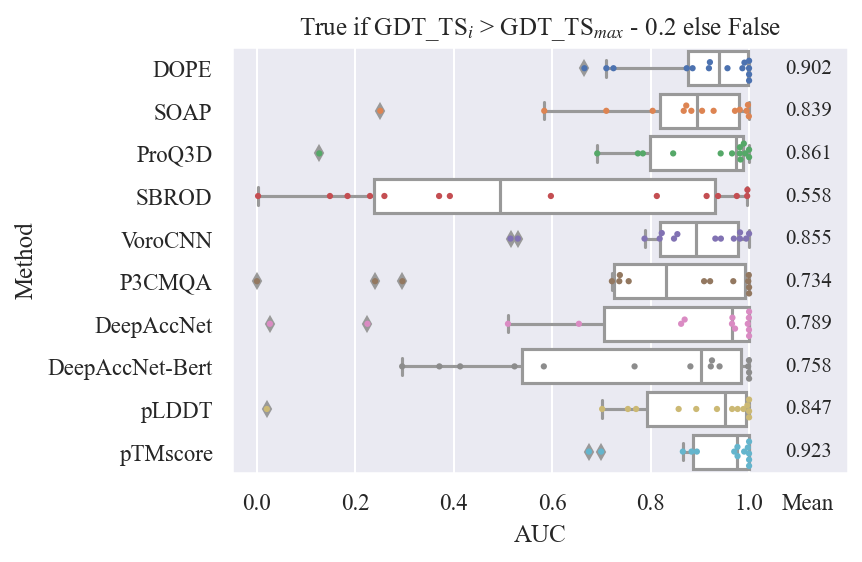

AUC
Method               
DOPE            0.902
DeepAccNet      0.789
DeepAccNet-Bert 0.758
P3CMQA          0.734
ProQ3D          0.861
SBROD           0.558
SOAP            0.839
VoroCNN         0.855
pLDDT           0.847
pTMscore        0.923

GDT_HA 0.05
True     20061
False     8839
Name: GDT_HA-0.05, dtype: int64
164


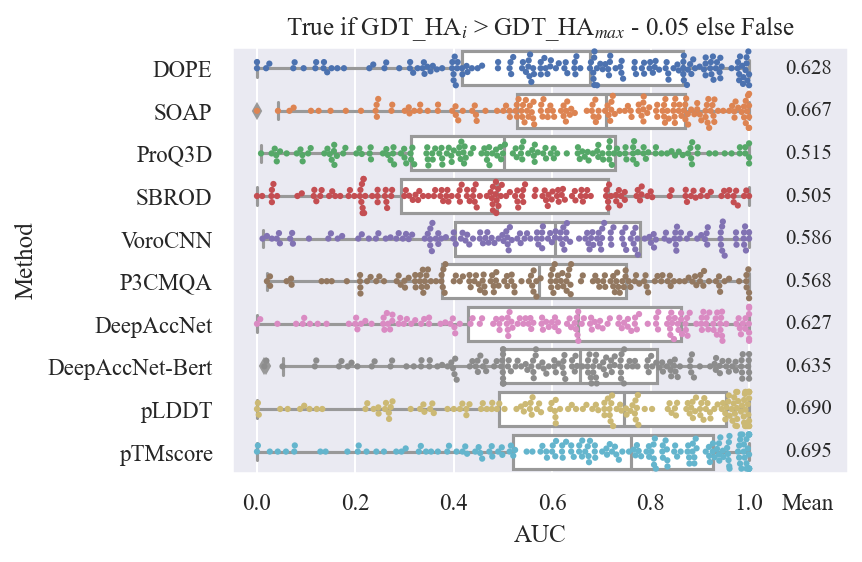

AUC
Method               
DOPE            0.628
DeepAccNet      0.627
DeepAccNet-Bert 0.635
P3CMQA          0.568
ProQ3D          0.515
SBROD           0.505
SOAP            0.667
VoroCNN         0.586
pLDDT           0.690
pTMscore        0.695

GDT_HA 0.1
True     7189
False    2611
Name: GDT_HA-0.1, dtype: int64
57


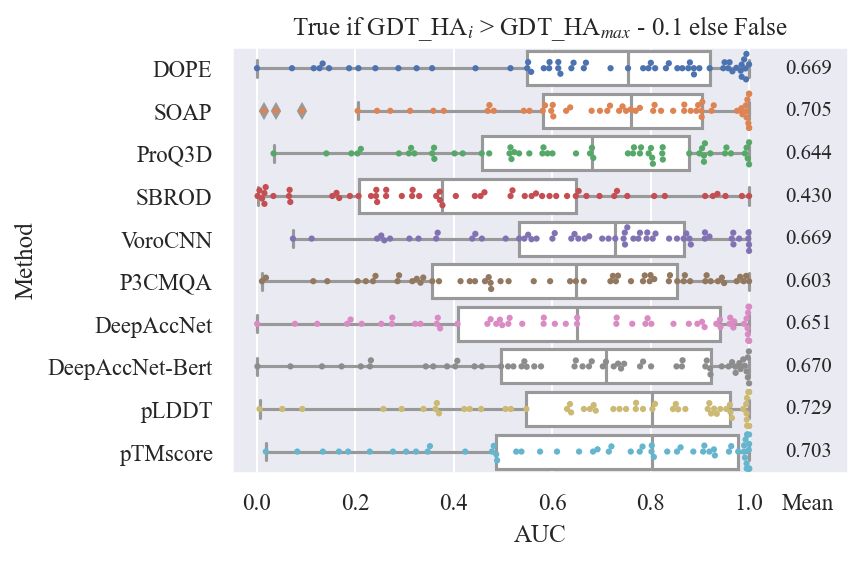

AUC
Method               
DOPE            0.669
DeepAccNet      0.651
DeepAccNet-Bert 0.670
P3CMQA          0.603
ProQ3D          0.644
SBROD           0.430
SOAP            0.705
VoroCNN         0.669
pLDDT           0.729
pTMscore        0.703

GDT_HA 0.15
True     3574
False    1326
Name: GDT_HA-0.15, dtype: int64
29


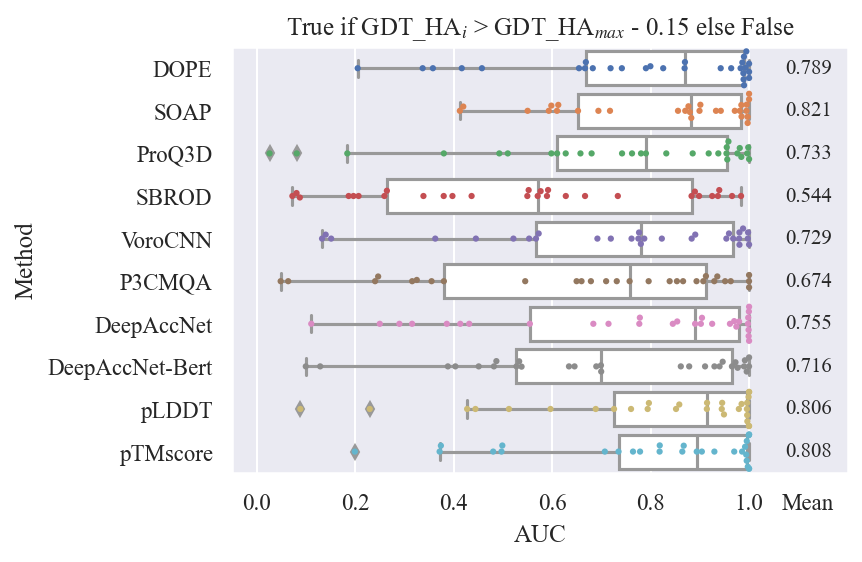

AUC
Method               
DOPE            0.789
DeepAccNet      0.755
DeepAccNet-Bert 0.716
P3CMQA          0.674
ProQ3D          0.733
SBROD           0.544
SOAP            0.821
VoroCNN         0.729
pLDDT           0.806
pTMscore        0.808

GDT_HA 0.2
True     2647
False     853
Name: GDT_HA-0.2, dtype: int64
20


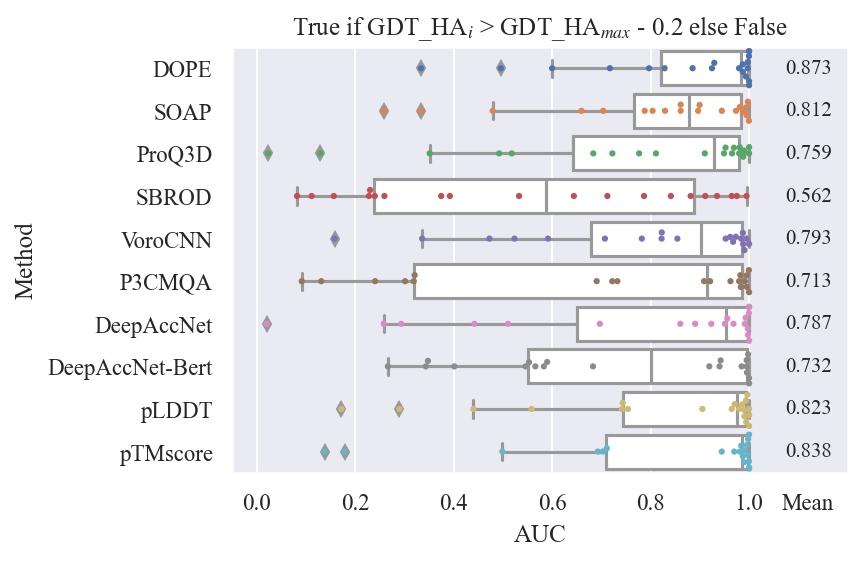

AUC
Method               
DOPE            0.873
DeepAccNet      0.787
DeepAccNet-Bert 0.732
P3CMQA          0.713
ProQ3D          0.759
SBROD           0.562
SOAP            0.812
VoroCNN         0.793
pLDDT           0.823
pTMscore        0.838

TMscore 0.05
True     5495
False    4005
Name: TMscore-0.05, dtype: int64
52


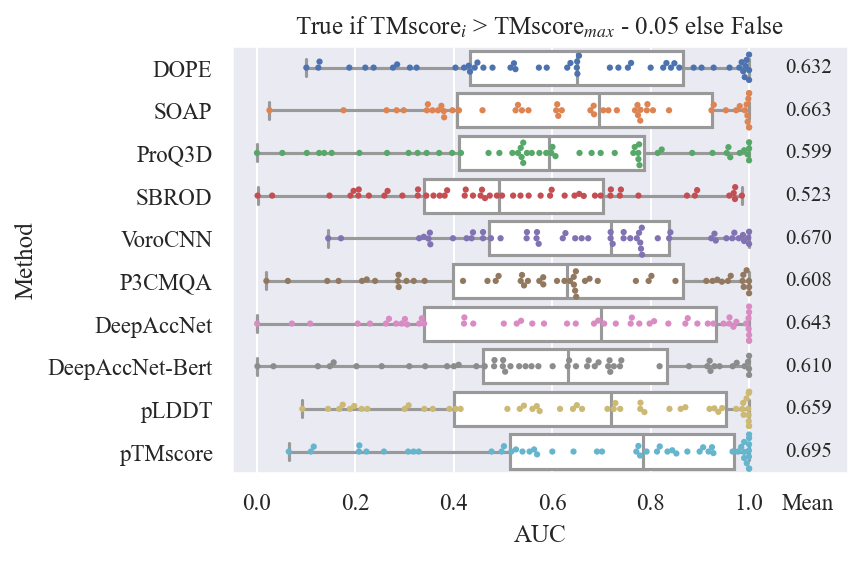

AUC
Method               
DOPE            0.632
DeepAccNet      0.643
DeepAccNet-Bert 0.610
P3CMQA          0.608
ProQ3D          0.599
SBROD           0.523
SOAP            0.663
VoroCNN         0.670
pLDDT           0.659
pTMscore        0.695

TMscore 0.1
True     2994
False    1806
Name: TMscore-0.1, dtype: int64
28


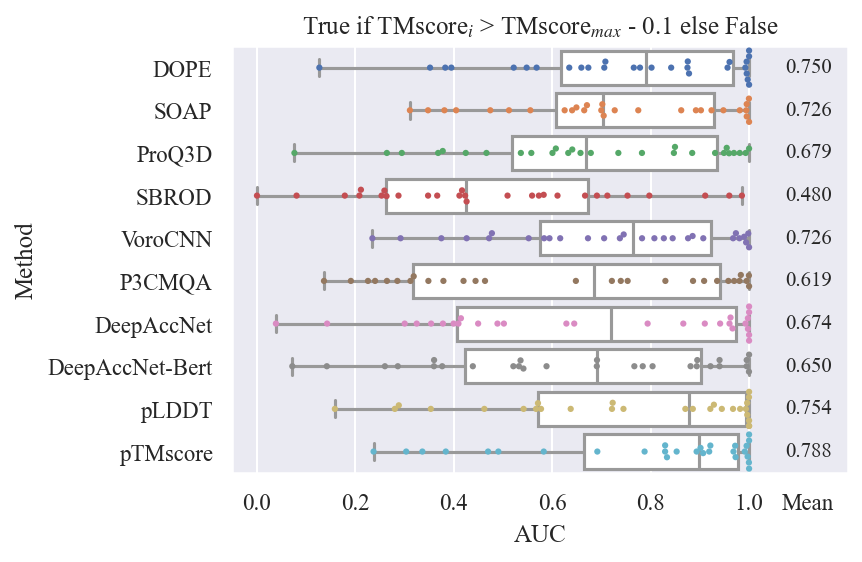

AUC
Method               
DOPE            0.750
DeepAccNet      0.674
DeepAccNet-Bert 0.650
P3CMQA          0.619
ProQ3D          0.679
SBROD           0.480
SOAP            0.726
VoroCNN         0.726
pLDDT           0.754
pTMscore        0.788

TMscore 0.15
True     2487
False    1113
Name: TMscore-0.15, dtype: int64
21


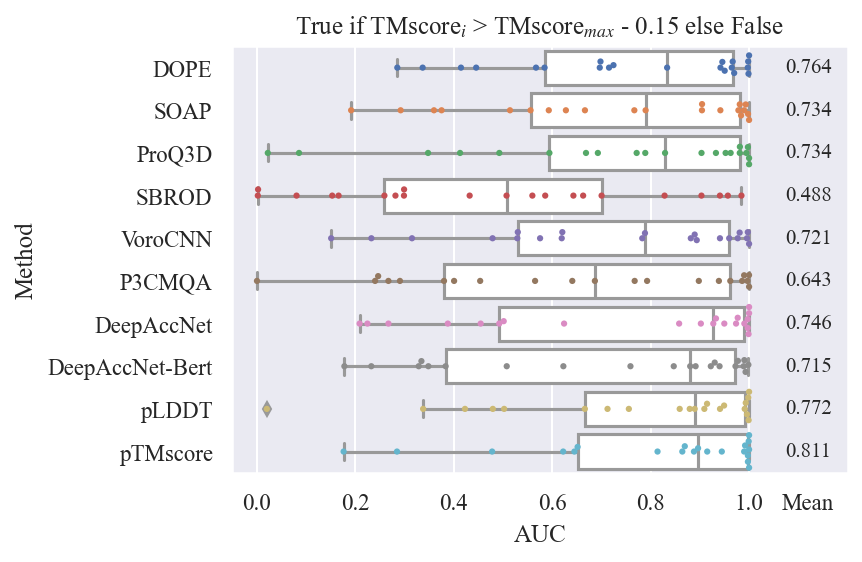

AUC
Method               
DOPE            0.764
DeepAccNet      0.746
DeepAccNet-Bert 0.715
P3CMQA          0.643
ProQ3D          0.734
SBROD           0.488
SOAP            0.734
VoroCNN         0.721
pLDDT           0.772
pTMscore        0.811

TMscore 0.2
True     1915
False     785
Name: TMscore-0.2, dtype: int64
16


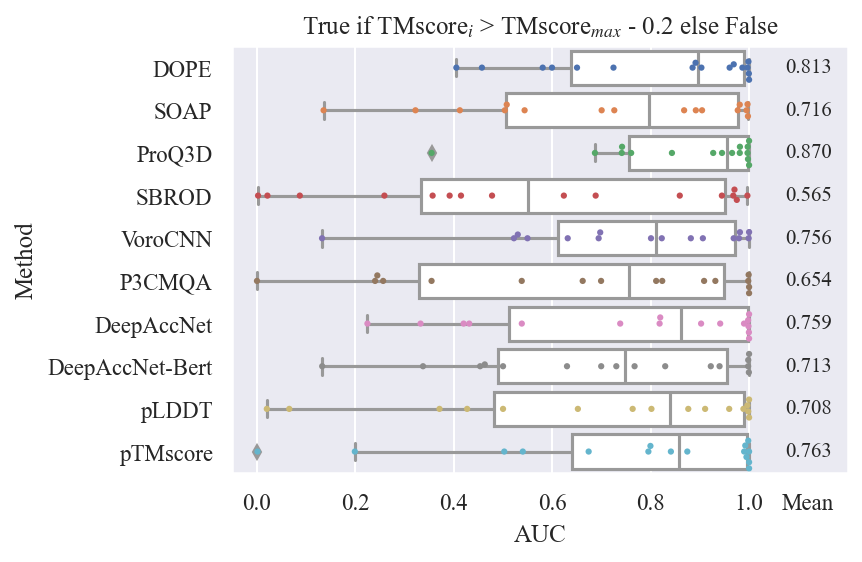

AUC
Method               
DOPE            0.813
DeepAccNet      0.759
DeepAccNet-Bert 0.713
P3CMQA          0.654
ProQ3D          0.870
SBROD           0.565
SOAP            0.716
VoroCNN         0.756
pLDDT           0.708
pTMscore        0.763

In [20]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore']
thresholds = [0.05, 0.1, 0.15, 0.2]
data = df[~df['pTMscore'].isna()]
for label in labels:
    for threshold in thresholds:
        rel_df = data.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
        l = f'{label}-{threshold}'
        print(label, threshold)
        print(rel_df[l].value_counts())
        print(rel_df['Target'].unique().size)
        results = []
        for method in methods:
            aucs = []
            targets = []
            for name, group in rel_df.groupby('Target'):
                if group[method].isna().any():
                    continue
                fpr, tpr, thres = roc_curve(group[l], group[method])
                auc_score = auc(fpr, tpr)
                aucs.append(auc_score)
                targets.append(name)
            if len(aucs) == 0:
                continue
            results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
        cdf = pd.concat(results)
        plt.title(f'True if {label}$_{{i}}$ > {label}$_{{max}}$ - {threshold} else False')
        sns.boxplot(data=cdf, y='Method', x='AUC', color='white')
        sns.swarmplot(data=cdf, y='Method', x='AUC', s=3)
        xticks_max = 1.12
        plt.xlim(-0.05, 1.2)
        xticks = np.append(np.arange(0, 1.2, 0.2), [xticks_max])
        xticks_str = list(map(lambda x: f'{x:.1f}', xticks))
        xticks_str[-1] = 'Mean'
        plt.xticks(xticks, xticks_str)
        plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
        mean_series = cdf.groupby('Method').mean()['AUC']
        for i, method in enumerate(methods):
            if method not in mean_series.index:
                continue
            value = mean_series[method]
            plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
        plt.tight_layout()
        plt.show()
        display(cdf.groupby('Method').mean())

### Targets with low AUC (label: GDT_TS, threshold: 0.05)

In [21]:
# validation
label = 'GDT_TS'
threshold = 0.05
data = df[~df['pTMscore'].isna()]
rel_df = data.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
l = f'{label}-{threshold}'
print(label, threshold)
print(rel_df[l].value_counts())
print(rel_df['Target'].unique().size)
results = []
for method in methods:
    aucs = []
    targets = []
    for name, group in rel_df.groupby('Target'):
        if group[method].isna().any():
            continue
        fpr, tpr, thres = roc_curve(group[l], group[method])
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)
        targets.append(name)
    if len(aucs) == 0:
        continue
    results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
cdf = pd.concat(results)
display(cdf.groupby('Method').mean())

GDT_TS 0.05
True     9808
False    5492
Name: GDT_TS-0.05, dtype: int64
87


AUC
Method               
DOPE            0.645
DeepAccNet      0.638
DeepAccNet-Bert 0.650
P3CMQA          0.586
ProQ3D          0.572
SBROD           0.517
SOAP            0.656
VoroCNN         0.638
pLDDT           0.673
pTMscore        0.677

In [22]:
method= 'pTMscore'
method_auc_df = cdf[cdf['Method'] == method].sort_values('AUC')
target_num = 10
sample_method_auc_df = method_auc_df.head(target_num)
display(sample_method_auc_df)
sample_targets = sample_method_auc_df['Target']

Method   AUC  Target
56  pTMscore 0.070  6S36_A
11  pTMscore 0.085  6AA8_C
0   pTMscore 0.096  5OJL_A
66  pTMscore 0.096  6WWD_A
42  pTMscore 0.102  6N9A_B
40  pTMscore 0.109  6LBU_B
4   pTMscore 0.194  5XX0_A
2   pTMscore 0.209  5XLL_A
46  pTMscore 0.238  6PFL_A
12  pTMscore 0.258  6D1V_A

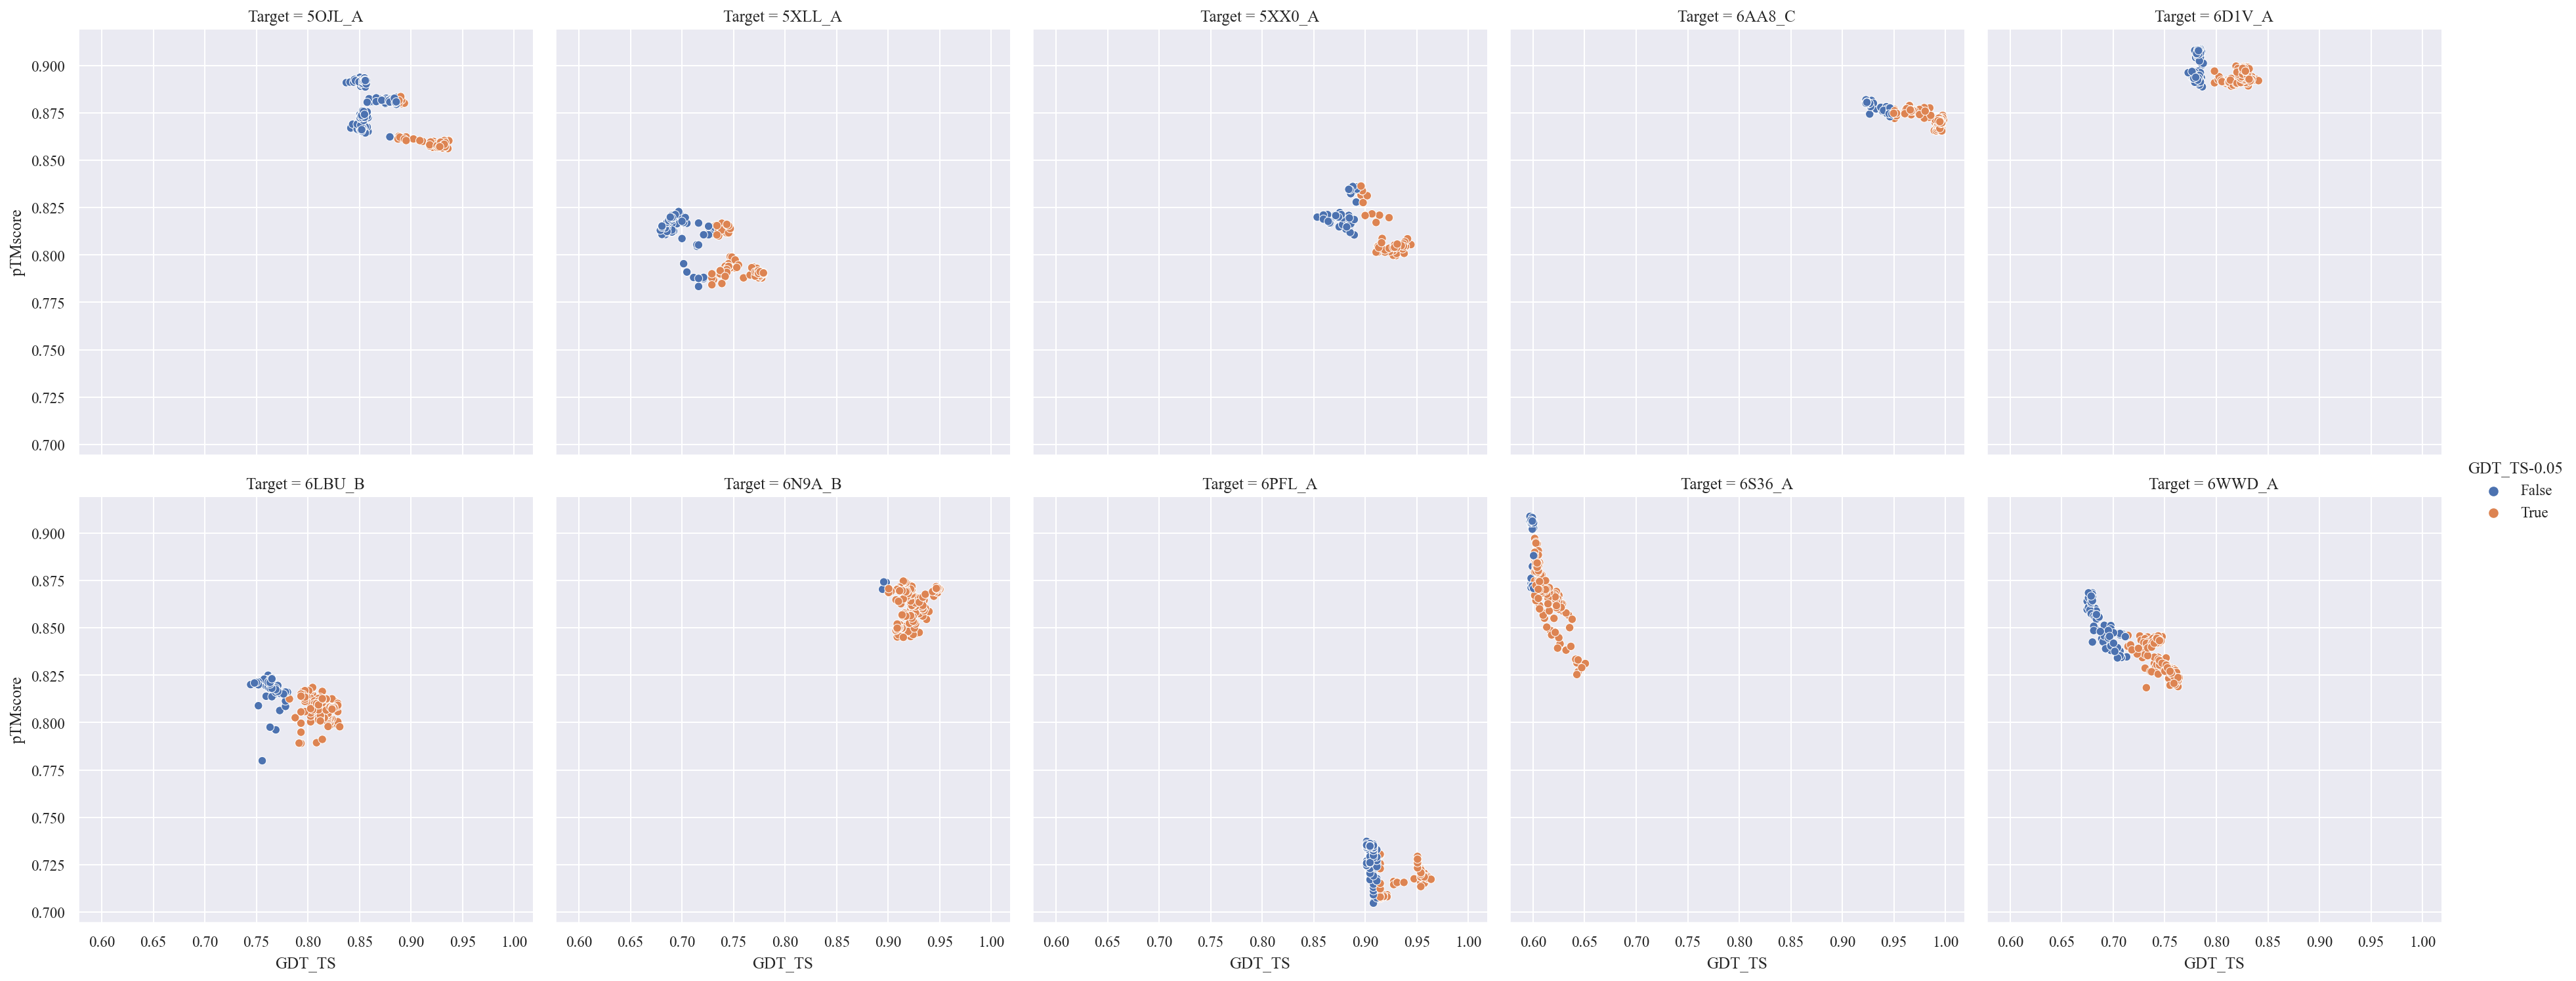

In [23]:
data = rel_df.query('Target in @sample_targets')
sns.relplot(data=data, x=label, y=method, kind='scatter', hue=l, col='Target', col_wrap=5)